# Multi-armed bandits

River has a `bandit` module. It contains several multi-armed bandit policies, bandit environments, and utilities to benchmark policies on bandit problems.

Bandit environments in River implement the [Gym](https://www.gymlibrary.dev/) interface. You can thus load them with `gym.make`. Note that Gym is intended for reinforcement learning algorithms, while bandit policies are the simplest form of reinforcement learing. Bandit policies learn by receiving a reward after each step, while reinforcement learning algorithms have to learn from feedback that may arrive at the end of a (long) sequence of steps.

In [1]:
import gymnasium as gym

for k in gym.envs.registry:
    if k.startswith('river_bandits'):
        print(k)


River's bandit module offers the `bandit.evaluate` function to benchmark several policies on a given environment. It takes as input a list of bandit policies, a bandit environment (the problem to solve), and a reward object.

In [2]:
import gymnasium as gym
from river import bandit
import pandas as pd
from tqdm import tqdm
from river import stats

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)

trace = bandit.evaluate(
    policies=policies,
    env=env,
    reward_stat=stats.Mean(),
    n_episodes=(n_episodes := 2000),
)


The `bandit.evaluate` function returns a generator containing the results at each step of the benchmark. This can be wrapped with a `pandas.DataFrame` to gather all the results.

In [3]:
trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))
trace_df.sample(5, random_state=42)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 11792/6000000 [00:00<00:50, 117907.18it/s]

  0%|          | 24001/6000000 [00:00<00:50, 119200.96it/s]

  1%|          | 36001/6000000 [00:00<00:50, 119157.99it/s]

  1%|          | 48039/6000000 [00:00<00:49, 119634.56it/s]

  1%|          | 60003/6000000 [00:00<00:49, 118946.88it/s]

  1%|          | 72001/6000000 [00:00<00:49, 119114.47it/s]

  1%|▏         | 84002/6000000 [00:00<00:49, 119388.10it/s]

  2%|▏         | 96027/6000000 [00:00<00:49, 119659.55it/s]

  2%|▏         | 108452/6000000 [00:00<00:48, 121087.74it/s]

  2%|▏         | 120562/6000000 [00:01<00:48, 120426.85it/s]

  2%|▏         | 132606/6000000 [00:01<00:48, 120216.09it/s]

  2%|▏         | 144629/6000000 [00:01<00:48, 119992.96it/s]

  3%|▎         | 156629/6000000 [00:01<00:48, 119252.51it/s]

  3%|▎         | 168608/6000000 [00:01<00:48, 119410.85it/s]

  3%|▎         | 180918/6000000 [00:01<00:48, 120515.37it/s]

  3%|▎         | 193023/6000000 [00:01<00:48, 120671.94it/s]

  3%|▎         | 205185/6000000 [00:01<00:47, 120955.44it/s]

  4%|▎         | 217282/6000000 [00:01<00:47, 120678.43it/s]

  4%|▍         | 229377/6000000 [00:01<00:47, 120756.60it/s]

  4%|▍         | 241454/6000000 [00:02<00:47, 120068.30it/s]

  4%|▍         | 253526/6000000 [00:02<00:47, 120261.09it/s]

  4%|▍         | 265553/6000000 [00:02<00:47, 120197.99it/s]

  5%|▍         | 277574/6000000 [00:02<00:47, 120020.73it/s]

  5%|▍         | 289577/6000000 [00:02<00:47, 119698.24it/s]

  5%|▌         | 301548/6000000 [00:02<00:47, 119127.25it/s]

  5%|▌         | 313462/6000000 [00:02<00:47, 119129.39it/s]

  5%|▌         | 325376/6000000 [00:02<00:47, 118760.63it/s]

  6%|▌         | 337333/6000000 [00:02<00:47, 118999.33it/s]

  6%|▌         | 349396/6000000 [00:02<00:47, 119483.96it/s]

  6%|▌         | 361424/6000000 [00:03<00:47, 119721.50it/s]

  6%|▌         | 373397/6000000 [00:03<00:47, 119480.11it/s]

  6%|▋         | 385346/6000000 [00:03<00:47, 119288.67it/s]

  7%|▋         | 397276/6000000 [00:03<00:47, 118957.70it/s]

  7%|▋         | 409309/6000000 [00:03<00:46, 119365.11it/s]

  7%|▋         | 421246/6000000 [00:03<00:46, 119091.92it/s]

  7%|▋         | 433272/6000000 [00:03<00:46, 119438.39it/s]

  7%|▋         | 445335/6000000 [00:03<00:46, 119793.88it/s]

  8%|▊         | 457315/6000000 [00:03<00:46, 119436.83it/s]

  8%|▊         | 469452/6000000 [00:03<00:46, 120014.18it/s]

  8%|▊         | 481454/6000000 [00:04<00:54, 100619.85it/s]

  8%|▊         | 493324/6000000 [00:04<00:52, 105389.89it/s]

  8%|▊         | 505155/6000000 [00:04<00:50, 108924.96it/s]

  9%|▊         | 516835/6000000 [00:04<00:49, 111138.20it/s]

  9%|▉         | 528463/6000000 [00:04<00:48, 112610.40it/s]

  9%|▉         | 540466/6000000 [00:04<00:47, 114762.97it/s]

  9%|▉         | 552506/6000000 [00:04<00:46, 116414.89it/s]

  9%|▉         | 564532/6000000 [00:04<00:46, 117548.15it/s]

 10%|▉         | 576501/6000000 [00:04<00:45, 118181.05it/s]

 10%|▉         | 588430/6000000 [00:04<00:45, 118510.56it/s]

 10%|█         | 600451/6000000 [00:05<00:45, 119010.76it/s]

 10%|█         | 612508/6000000 [00:05<00:45, 119475.03it/s]

 10%|█         | 624474/6000000 [00:05<00:45, 119353.41it/s]

 11%|█         | 636422/6000000 [00:05<00:45, 119124.05it/s]

 11%|█         | 648344/6000000 [00:05<00:45, 118779.89it/s]

 11%|█         | 660229/6000000 [00:05<00:44, 118758.92it/s]

 11%|█         | 672131/6000000 [00:05<00:44, 118834.97it/s]

 11%|█▏        | 684189/6000000 [00:05<00:44, 119355.66it/s]

 12%|█▏        | 696316/6000000 [00:05<00:44, 119927.95it/s]

 12%|█▏        | 708330/6000000 [00:05<00:44, 119989.38it/s]

 12%|█▏        | 720374/6000000 [00:06<00:43, 120123.37it/s]

 12%|█▏        | 732465/6000000 [00:06<00:43, 120357.52it/s]

 12%|█▏        | 744502/6000000 [00:06<00:43, 120136.78it/s]

 13%|█▎        | 756517/6000000 [00:06<00:43, 119747.51it/s]

 13%|█▎        | 768493/6000000 [00:06<00:48, 108746.53it/s]

 13%|█▎        | 780554/6000000 [00:06<00:46, 112061.07it/s]

 13%|█▎        | 792541/6000000 [00:06<00:45, 114287.36it/s]

 13%|█▎        | 804565/6000000 [00:06<00:44, 116010.29it/s]

 14%|█▎        | 816637/6000000 [00:06<00:44, 117386.92it/s]

 14%|█▍        | 828875/6000000 [00:07<00:43, 118857.37it/s]

 14%|█▍        | 841052/6000000 [00:07<00:43, 119718.49it/s]

 14%|█▍        | 853061/6000000 [00:07<00:43, 119610.44it/s]

 14%|█▍        | 865048/6000000 [00:07<00:42, 119590.30it/s]

 15%|█▍        | 877047/6000000 [00:07<00:42, 119708.88it/s]

 15%|█▍        | 889031/6000000 [00:07<00:43, 117920.70it/s]

 15%|█▌        | 901026/6000000 [00:07<00:43, 118518.37it/s]

 15%|█▌        | 912967/6000000 [00:07<00:42, 118782.42it/s]

 15%|█▌        | 925125/6000000 [00:07<00:42, 119613.99it/s]

 16%|█▌        | 937093/6000000 [00:07<00:42, 119458.97it/s]

 16%|█▌        | 949044/6000000 [00:08<00:42, 119326.47it/s]

 16%|█▌        | 960980/6000000 [00:08<00:42, 119051.95it/s]

 16%|█▌        | 973040/6000000 [00:08<00:42, 119511.63it/s]

 16%|█▋        | 984993/6000000 [00:08<00:42, 119064.48it/s]

 17%|█▋        | 996901/6000000 [00:08<00:42, 118987.25it/s]

 17%|█▋        | 1008963/6000000 [00:08<00:41, 119472.58it/s]

 17%|█▋        | 1020912/6000000 [00:08<00:41, 119194.19it/s]

 17%|█▋        | 1032833/6000000 [00:08<00:41, 119006.25it/s]

 17%|█▋        | 1044791/6000000 [00:08<00:41, 119174.98it/s]

 18%|█▊        | 1056742/6000000 [00:08<00:41, 119272.80it/s]

 18%|█▊        | 1068692/6000000 [00:09<00:41, 119338.99it/s]

 18%|█▊        | 1080630/6000000 [00:09<00:41, 119349.69it/s]

 18%|█▊        | 1092741/6000000 [00:09<00:40, 119874.77it/s]

 18%|█▊        | 1104729/6000000 [00:09<00:40, 119462.14it/s]

 19%|█▊        | 1116928/6000000 [00:09<00:40, 120217.58it/s]

 19%|█▉        | 1128951/6000000 [00:09<00:41, 118471.82it/s]

 19%|█▉        | 1140926/6000000 [00:09<00:40, 118847.99it/s]

 19%|█▉        | 1153099/6000000 [00:09<00:40, 119704.78it/s]

 19%|█▉        | 1165074/6000000 [00:09<00:40, 119354.68it/s]

 20%|█▉        | 1177114/6000000 [00:09<00:40, 119663.92it/s]

 20%|█▉        | 1189083/6000000 [00:10<00:40, 119652.65it/s]

 20%|██        | 1201114/6000000 [00:10<00:40, 119848.42it/s]

 20%|██        | 1213136/6000000 [00:10<00:39, 119957.62it/s]

 20%|██        | 1225146/6000000 [00:10<00:39, 119998.08it/s]

 21%|██        | 1237147/6000000 [00:10<00:39, 119640.19it/s]

 21%|██        | 1249112/6000000 [00:10<00:40, 118111.41it/s]

 21%|██        | 1261317/6000000 [00:10<00:39, 119277.91it/s]

 21%|██        | 1273407/6000000 [00:10<00:39, 119759.95it/s]

 21%|██▏       | 1285514/6000000 [00:10<00:39, 120148.64it/s]

 22%|██▏       | 1297532/6000000 [00:10<00:39, 119914.96it/s]

 22%|██▏       | 1309526/6000000 [00:11<00:39, 119707.85it/s]

 22%|██▏       | 1321499/6000000 [00:11<00:39, 119513.00it/s]

 22%|██▏       | 1333614/6000000 [00:11<00:38, 119999.15it/s]

 22%|██▏       | 1345615/6000000 [00:11<00:38, 119878.63it/s]

 23%|██▎       | 1357622/6000000 [00:11<00:38, 119934.46it/s]

 23%|██▎       | 1369616/6000000 [00:11<00:38, 119583.50it/s]

 23%|██▎       | 1381612/6000000 [00:11<00:38, 119693.88it/s]

 23%|██▎       | 1393587/6000000 [00:11<00:38, 119708.92it/s]

 23%|██▎       | 1405559/6000000 [00:11<00:38, 119649.05it/s]

 24%|██▎       | 1417525/6000000 [00:11<00:38, 119227.48it/s]

 24%|██▍       | 1429449/6000000 [00:12<00:38, 119108.85it/s]

 24%|██▍       | 1441361/6000000 [00:12<00:38, 118981.67it/s]

 24%|██▍       | 1453308/6000000 [00:12<00:38, 119124.45it/s]

 24%|██▍       | 1465305/6000000 [00:12<00:37, 119374.71it/s]

 25%|██▍       | 1477275/6000000 [00:12<00:37, 119469.54it/s]

 25%|██▍       | 1489404/6000000 [00:12<00:37, 120013.92it/s]

 25%|██▌       | 1501406/6000000 [00:12<00:38, 117499.12it/s]

 25%|██▌       | 1513182/6000000 [00:12<00:38, 117573.66it/s]

 25%|██▌       | 1525005/6000000 [00:12<00:37, 117766.14it/s]

 26%|██▌       | 1536892/6000000 [00:12<00:37, 118094.23it/s]

 26%|██▌       | 1548751/6000000 [00:13<00:37, 118240.61it/s]

 26%|██▌       | 1560806/6000000 [00:13<00:37, 118928.92it/s]

 26%|██▌       | 1573022/6000000 [00:13<00:36, 119894.78it/s]

 26%|██▋       | 1585014/6000000 [00:13<00:36, 119709.90it/s]

 27%|██▋       | 1596987/6000000 [00:13<00:36, 119354.18it/s]

 27%|██▋       | 1608987/6000000 [00:13<00:36, 119544.75it/s]

 27%|██▋       | 1620943/6000000 [00:13<00:36, 119526.75it/s]

 27%|██▋       | 1632897/6000000 [00:13<00:36, 119329.39it/s]

 27%|██▋       | 1644879/6000000 [00:13<00:36, 119473.93it/s]

 28%|██▊       | 1656827/6000000 [00:13<00:36, 119249.91it/s]

 28%|██▊       | 1668781/6000000 [00:14<00:36, 119334.53it/s]

 28%|██▊       | 1680715/6000000 [00:14<00:36, 119186.27it/s]

 28%|██▊       | 1692728/6000000 [00:14<00:36, 119467.44it/s]

 28%|██▊       | 1704675/6000000 [00:14<00:36, 119161.71it/s]

 29%|██▊       | 1716599/6000000 [00:14<00:35, 119183.89it/s]

 29%|██▉       | 1728533/6000000 [00:14<00:35, 119229.81it/s]

 29%|██▉       | 1740457/6000000 [00:14<00:36, 117061.37it/s]

 29%|██▉       | 1752327/6000000 [00:14<00:36, 117543.30it/s]

 29%|██▉       | 1764260/6000000 [00:14<00:35, 118072.13it/s]

 30%|██▉       | 1776381/6000000 [00:14<00:35, 119004.30it/s]

 30%|██▉       | 1788289/6000000 [00:15<00:35, 119024.56it/s]

 30%|███       | 1800295/6000000 [00:15<00:35, 119331.37it/s]

 30%|███       | 1812285/6000000 [00:15<00:35, 119501.07it/s]

 30%|███       | 1824281/6000000 [00:15<00:34, 119637.44it/s]

 31%|███       | 1836248/6000000 [00:15<00:34, 119644.75it/s]

 31%|███       | 1848238/6000000 [00:15<00:34, 119718.56it/s]

 31%|███       | 1860211/6000000 [00:15<00:34, 119114.93it/s]

 31%|███       | 1872149/6000000 [00:15<00:34, 119191.28it/s]

 31%|███▏      | 1884081/6000000 [00:15<00:34, 119228.38it/s]

 32%|███▏      | 1896071/6000000 [00:15<00:34, 119426.77it/s]

 32%|███▏      | 1908015/6000000 [00:16<00:34, 119118.69it/s]

 32%|███▏      | 1920001/6000000 [00:16<00:34, 119219.83it/s]

 32%|███▏      | 1932001/6000000 [00:16<00:34, 118982.40it/s]

 32%|███▏      | 1944124/6000000 [00:16<00:33, 119650.61it/s]

 33%|███▎      | 1956410/6000000 [00:16<00:33, 120608.08it/s]

 33%|███▎      | 1968472/6000000 [00:16<00:33, 120034.78it/s]

 33%|███▎      | 1980477/6000000 [00:16<00:34, 117753.38it/s]

 33%|███▎      | 1992346/6000000 [00:16<00:33, 118027.09it/s]

 33%|███▎      | 2004254/6000000 [00:16<00:33, 118336.57it/s]

 34%|███▎      | 2016175/6000000 [00:16<00:33, 118594.34it/s]

 34%|███▍      | 2028039/6000000 [00:17<00:33, 118599.81it/s]

 34%|███▍      | 2040001/6000000 [00:17<00:33, 118633.55it/s]

 34%|███▍      | 2052003/6000000 [00:17<00:33, 118992.57it/s]

 34%|███▍      | 2064080/6000000 [00:17<00:32, 119521.50it/s]

 35%|███▍      | 2076141/6000000 [00:17<00:32, 119846.26it/s]

 35%|███▍      | 2088299/6000000 [00:17<00:32, 120362.85it/s]

 35%|███▌      | 2100337/6000000 [00:17<00:32, 119463.31it/s]

 35%|███▌      | 2112371/6000000 [00:17<00:32, 119722.61it/s]

 35%|███▌      | 2124441/6000000 [00:17<00:32, 120011.52it/s]

 36%|███▌      | 2136444/6000000 [00:17<00:32, 119986.97it/s]

 36%|███▌      | 2148444/6000000 [00:18<00:32, 119741.05it/s]

 36%|███▌      | 2160419/6000000 [00:18<00:32, 119488.67it/s]

 36%|███▌      | 2172369/6000000 [00:18<00:32, 119468.84it/s]

 36%|███▋      | 2184426/6000000 [00:18<00:31, 119795.43it/s]

 37%|███▋      | 2196558/6000000 [00:18<00:31, 120250.51it/s]

 37%|███▋      | 2208584/6000000 [00:18<00:31, 120240.42it/s]

 37%|███▋      | 2220648/6000000 [00:18<00:31, 120358.49it/s]

 37%|███▋      | 2232743/6000000 [00:18<00:31, 120535.16it/s]

 37%|███▋      | 2244797/6000000 [00:18<00:31, 119959.41it/s]

 38%|███▊      | 2256794/6000000 [00:18<00:31, 119883.07it/s]

 38%|███▊      | 2268783/6000000 [00:19<00:31, 119668.78it/s]

 38%|███▊      | 2280782/6000000 [00:19<00:31, 119763.48it/s]

 38%|███▊      | 2292759/6000000 [00:19<00:30, 119684.00it/s]

 38%|███▊      | 2304728/6000000 [00:19<00:30, 119673.19it/s]

 39%|███▊      | 2316897/6000000 [00:19<00:30, 120274.30it/s]

 39%|███▉      | 2328925/6000000 [00:19<00:30, 120230.09it/s]

 39%|███▉      | 2340949/6000000 [00:19<00:31, 117628.52it/s]

 39%|███▉      | 2353111/6000000 [00:19<00:30, 118804.08it/s]

 39%|███▉      | 2365077/6000000 [00:19<00:30, 119056.90it/s]

 40%|███▉      | 2376991/6000000 [00:19<00:30, 118986.94it/s]

 40%|███▉      | 2388985/6000000 [00:20<00:30, 119270.55it/s]

 40%|████      | 2400916/6000000 [00:20<00:30, 119277.35it/s]

 40%|████      | 2412870/6000000 [00:20<00:30, 119355.09it/s]

 40%|████      | 2424913/6000000 [00:20<00:29, 119675.54it/s]

 41%|████      | 2437149/6000000 [00:20<00:29, 120477.38it/s]

 41%|████      | 2449372/6000000 [00:20<00:29, 120999.53it/s]

 41%|████      | 2461473/6000000 [00:20<00:29, 120921.12it/s]

 41%|████      | 2473566/6000000 [00:20<00:29, 120775.64it/s]

 41%|████▏     | 2485645/6000000 [00:20<00:29, 120734.71it/s]

 42%|████▏     | 2497719/6000000 [00:20<00:29, 120140.60it/s]

 42%|████▏     | 2509803/6000000 [00:21<00:29, 120346.96it/s]

 42%|████▏     | 2521978/6000000 [00:21<00:28, 120766.08it/s]

 42%|████▏     | 2534056/6000000 [00:21<00:28, 119862.39it/s]

 42%|████▏     | 2546045/6000000 [00:21<00:28, 119821.19it/s]

 43%|████▎     | 2558029/6000000 [00:21<00:28, 119775.61it/s]

 43%|████▎     | 2570008/6000000 [00:21<00:28, 119394.58it/s]

 43%|████▎     | 2581949/6000000 [00:21<00:29, 117310.33it/s]

 43%|████▎     | 2593688/6000000 [00:21<00:29, 117158.21it/s]

 43%|████▎     | 2605557/6000000 [00:21<00:28, 117611.21it/s]

 44%|████▎     | 2617541/6000000 [00:22<00:28, 118271.08it/s]

 44%|████▍     | 2629381/6000000 [00:22<00:28, 118307.54it/s]

 44%|████▍     | 2641519/6000000 [00:22<00:28, 119223.05it/s]

 44%|████▍     | 2653444/6000000 [00:22<00:28, 119155.26it/s]

 44%|████▍     | 2665362/6000000 [00:22<00:28, 119024.71it/s]

 45%|████▍     | 2677353/6000000 [00:22<00:27, 119289.13it/s]

 45%|████▍     | 2689283/6000000 [00:22<00:27, 119077.24it/s]

 45%|████▌     | 2701192/6000000 [00:22<00:27, 118892.28it/s]

 45%|████▌     | 2713082/6000000 [00:22<00:35, 93237.68it/s] 

 45%|████▌     | 2725025/6000000 [00:23<00:32, 99810.51it/s]

 46%|████▌     | 2736964/6000000 [00:23<00:31, 104977.73it/s]

 46%|████▌     | 2748926/6000000 [00:23<00:29, 108984.29it/s]

 46%|████▌     | 2761002/6000000 [00:23<00:28, 112293.98it/s]

 46%|████▌     | 2773017/6000000 [00:23<00:28, 114543.76it/s]

 46%|████▋     | 2785075/6000000 [00:23<00:27, 116295.16it/s]

 47%|████▋     | 2797018/6000000 [00:23<00:27, 117212.04it/s]

 47%|████▋     | 2808865/6000000 [00:23<00:27, 117412.07it/s]

 47%|████▋     | 2820695/6000000 [00:23<00:27, 117144.85it/s]

 47%|████▋     | 2832571/6000000 [00:23<00:26, 117623.10it/s]

 47%|████▋     | 2844591/6000000 [00:24<00:26, 118387.08it/s]

 48%|████▊     | 2856532/6000000 [00:24<00:26, 118689.43it/s]

 48%|████▊     | 2868574/6000000 [00:24<00:26, 119202.36it/s]

 48%|████▊     | 2880510/6000000 [00:24<00:26, 119081.22it/s]

 48%|████▊     | 2892533/6000000 [00:24<00:26, 119422.64it/s]

 48%|████▊     | 2904797/6000000 [00:24<00:25, 120385.07it/s]

 49%|████▊     | 2916842/6000000 [00:24<00:25, 119887.05it/s]

 49%|████▉     | 2928836/6000000 [00:24<00:25, 119672.05it/s]

 49%|████▉     | 2940807/6000000 [00:24<00:25, 119503.14it/s]

 49%|████▉     | 2952938/6000000 [00:24<00:25, 120041.28it/s]

 49%|████▉     | 2964944/6000000 [00:25<00:25, 119578.93it/s]

 50%|████▉     | 2976987/6000000 [00:25<00:25, 119832.06it/s]

 50%|████▉     | 2988974/6000000 [00:25<00:25, 119842.33it/s]

 50%|█████     | 3000960/6000000 [00:25<00:25, 119583.29it/s]

 50%|█████     | 3012919/6000000 [00:25<00:24, 119539.30it/s]

 50%|█████     | 3024913/6000000 [00:25<00:24, 119658.05it/s]

 51%|█████     | 3036880/6000000 [00:25<00:24, 119388.97it/s]

 51%|█████     | 3048820/6000000 [00:25<00:24, 119379.53it/s]

 51%|█████     | 3060759/6000000 [00:25<00:24, 119170.13it/s]

 51%|█████     | 3072827/6000000 [00:25<00:24, 119619.18it/s]

 51%|█████▏    | 3084790/6000000 [00:26<00:24, 119341.98it/s]

 52%|█████▏    | 3096816/6000000 [00:26<00:24, 119614.73it/s]

 52%|█████▏    | 3108870/6000000 [00:26<00:24, 119890.31it/s]

 52%|█████▏    | 3120860/6000000 [00:26<00:24, 119546.69it/s]

 52%|█████▏    | 3132820/6000000 [00:26<00:23, 119560.70it/s]

 52%|█████▏    | 3144817/6000000 [00:26<00:23, 119681.55it/s]

 53%|█████▎    | 3156821/6000000 [00:26<00:23, 119787.25it/s]

 53%|█████▎    | 3168800/6000000 [00:26<00:23, 119733.53it/s]

 53%|█████▎    | 3180774/6000000 [00:26<00:23, 119564.05it/s]

 53%|█████▎    | 3192731/6000000 [00:26<00:23, 119346.44it/s]

 53%|█████▎    | 3204786/6000000 [00:27<00:23, 119704.93it/s]

 54%|█████▎    | 3216757/6000000 [00:27<00:23, 119328.96it/s]

 54%|█████▍    | 3228713/6000000 [00:27<00:23, 119395.17it/s]

 54%|█████▍    | 3240653/6000000 [00:27<00:23, 119164.70it/s]

 54%|█████▍    | 3252661/6000000 [00:27<00:23, 119435.93it/s]

 54%|█████▍    | 3264667/6000000 [00:27<00:22, 119620.90it/s]

 55%|█████▍    | 3276813/6000000 [00:27<00:22, 120171.22it/s]

 55%|█████▍    | 3288838/6000000 [00:27<00:22, 120193.58it/s]

 55%|█████▌    | 3300858/6000000 [00:27<00:22, 119535.22it/s]

 55%|█████▌    | 3312852/6000000 [00:27<00:22, 119653.26it/s]

 55%|█████▌    | 3324819/6000000 [00:28<00:22, 119397.70it/s]

 56%|█████▌    | 3336760/6000000 [00:28<00:22, 119342.81it/s]

 56%|█████▌    | 3348939/6000000 [00:28<00:22, 120072.80it/s]

 56%|█████▌    | 3360947/6000000 [00:28<00:22, 119335.29it/s]

 56%|█████▌    | 3372972/6000000 [00:28<00:21, 119606.97it/s]

 56%|█████▋    | 3385154/6000000 [00:28<00:21, 120266.34it/s]

 57%|█████▋    | 3397182/6000000 [00:28<00:21, 119695.92it/s]

 57%|█████▋    | 3409173/6000000 [00:28<00:21, 119758.99it/s]

 57%|█████▋    | 3421150/6000000 [00:28<00:22, 115968.96it/s]

 57%|█████▋    | 3433153/6000000 [00:28<00:21, 117154.43it/s]

 57%|█████▋    | 3445248/6000000 [00:29<00:21, 118270.23it/s]

 58%|█████▊    | 3457282/6000000 [00:29<00:21, 118881.47it/s]

 58%|█████▊    | 3469302/6000000 [00:29<00:21, 119270.98it/s]

 58%|█████▊    | 3481239/6000000 [00:29<00:21, 119181.67it/s]

 58%|█████▊    | 3493164/6000000 [00:29<00:21, 119097.60it/s]

 58%|█████▊    | 3505162/6000000 [00:29<00:20, 119358.79it/s]

 59%|█████▊    | 3517159/6000000 [00:29<00:20, 119540.38it/s]

 59%|█████▉    | 3529116/6000000 [00:29<00:20, 119310.31it/s]

 59%|█████▉    | 3541158/6000000 [00:29<00:20, 119636.77it/s]

 59%|█████▉    | 3553219/6000000 [00:29<00:20, 119926.13it/s]

 59%|█████▉    | 3565213/6000000 [00:30<00:20, 119484.84it/s]

 60%|█████▉    | 3577163/6000000 [00:30<00:20, 118840.72it/s]

 60%|█████▉    | 3589087/6000000 [00:30<00:20, 118957.84it/s]

 60%|██████    | 3600984/6000000 [00:30<00:20, 118494.73it/s]

 60%|██████    | 3612835/6000000 [00:30<00:20, 118385.34it/s]

 60%|██████    | 3624930/6000000 [00:30<00:19, 119150.16it/s]

 61%|██████    | 3636846/6000000 [00:30<00:19, 119138.53it/s]

 61%|██████    | 3648846/6000000 [00:30<00:19, 119394.33it/s]

 61%|██████    | 3660786/6000000 [00:30<00:19, 119364.95it/s]

 61%|██████    | 3672723/6000000 [00:30<00:19, 119320.56it/s]

 61%|██████▏   | 3684817/6000000 [00:31<00:19, 119803.09it/s]

 62%|██████▏   | 3696798/6000000 [00:31<00:19, 119364.87it/s]

 62%|██████▏   | 3708735/6000000 [00:31<00:19, 118886.26it/s]

 62%|██████▏   | 3720625/6000000 [00:31<00:19, 118421.58it/s]

 62%|██████▏   | 3732601/6000000 [00:31<00:19, 118818.08it/s]

 62%|██████▏   | 3744667/6000000 [00:31<00:18, 119365.77it/s]

 63%|██████▎   | 3756605/6000000 [00:31<00:18, 119197.70it/s]

 63%|██████▎   | 3768526/6000000 [00:31<00:18, 118960.54it/s]

 63%|██████▎   | 3780542/6000000 [00:31<00:18, 119318.16it/s]

 63%|██████▎   | 3792475/6000000 [00:31<00:19, 115432.66it/s]

 63%|██████▎   | 3804421/6000000 [00:32<00:18, 116610.02it/s]

 64%|██████▎   | 3816342/6000000 [00:32<00:18, 117373.51it/s]

 64%|██████▍   | 3828191/6000000 [00:32<00:18, 117703.28it/s]

 64%|██████▍   | 3840151/6000000 [00:32<00:18, 118266.13it/s]

 64%|██████▍   | 3852283/6000000 [00:32<00:18, 119175.81it/s]

 64%|██████▍   | 3864302/6000000 [00:32<00:17, 119477.95it/s]

 65%|██████▍   | 3876255/6000000 [00:32<00:17, 119111.24it/s]

 65%|██████▍   | 3888170/6000000 [00:32<00:17, 118980.33it/s]

 65%|██████▌   | 3900071/6000000 [00:32<00:17, 118517.21it/s]

 65%|██████▌   | 3912001/6000000 [00:32<00:17, 118575.77it/s]

 65%|██████▌   | 3924001/6000000 [00:33<00:17, 118697.77it/s]

 66%|██████▌   | 3936001/6000000 [00:33<00:17, 118736.08it/s]

 66%|██████▌   | 3948001/6000000 [00:33<00:17, 118691.16it/s]

 66%|██████▌   | 3960001/6000000 [00:33<00:17, 119064.64it/s]

 66%|██████▌   | 3972001/6000000 [00:33<00:17, 119224.63it/s]

 66%|██████▋   | 3984001/6000000 [00:33<00:16, 118931.29it/s]

 67%|██████▋   | 3996001/6000000 [00:33<00:16, 118633.41it/s]

 67%|██████▋   | 4008013/6000000 [00:33<00:16, 119074.12it/s]

 67%|██████▋   | 4020001/6000000 [00:33<00:16, 118940.29it/s]

 67%|██████▋   | 4031896/6000000 [00:33<00:17, 115451.28it/s]

 67%|██████▋   | 4043761/6000000 [00:34<00:16, 116385.67it/s]

 68%|██████▊   | 4055555/6000000 [00:34<00:16, 116841.76it/s]

 68%|██████▊   | 4067269/6000000 [00:34<00:16, 116928.59it/s]

 68%|██████▊   | 4079050/6000000 [00:34<00:16, 117187.84it/s]

 68%|██████▊   | 4090776/6000000 [00:34<00:16, 117204.80it/s]

 68%|██████▊   | 4102502/6000000 [00:34<00:16, 116972.08it/s]

 69%|██████▊   | 4114489/6000000 [00:34<00:16, 117835.38it/s]

 69%|██████▉   | 4126284/6000000 [00:34<00:15, 117869.02it/s]

 69%|██████▉   | 4138075/6000000 [00:34<00:15, 117879.13it/s]

 69%|██████▉   | 4149865/6000000 [00:34<00:16, 114165.97it/s]

 69%|██████▉   | 4161947/6000000 [00:35<00:15, 116114.96it/s]

 70%|██████▉   | 4173929/6000000 [00:35<00:15, 117207.11it/s]

 70%|██████▉   | 4185778/6000000 [00:35<00:15, 117585.96it/s]

 70%|██████▉   | 4197933/6000000 [00:35<00:15, 118763.56it/s]

 70%|███████   | 4209895/6000000 [00:35<00:15, 119017.53it/s]

 70%|███████   | 4221849/6000000 [00:35<00:14, 119171.47it/s]

 71%|███████   | 4233824/6000000 [00:35<00:14, 119343.80it/s]

 71%|███████   | 4245762/6000000 [00:35<00:14, 119351.69it/s]

 71%|███████   | 4257700/6000000 [00:35<00:14, 118925.05it/s]

 71%|███████   | 4269595/6000000 [00:35<00:14, 118743.22it/s]

 71%|███████▏  | 4281512/6000000 [00:36<00:14, 118866.42it/s]

 72%|███████▏  | 4293470/6000000 [00:36<00:14, 119078.88it/s]

 72%|███████▏  | 4305400/6000000 [00:36<00:14, 119144.20it/s]

 72%|███████▏  | 4317315/6000000 [00:36<00:14, 119142.74it/s]

 72%|███████▏  | 4329264/6000000 [00:36<00:14, 119246.26it/s]

 72%|███████▏  | 4341258/6000000 [00:36<00:13, 119452.15it/s]

 73%|███████▎  | 4353362/6000000 [00:36<00:13, 119927.38it/s]

 73%|███████▎  | 4365355/6000000 [00:36<00:13, 119871.37it/s]

 73%|███████▎  | 4377373/6000000 [00:36<00:13, 119962.74it/s]

 73%|███████▎  | 4389370/6000000 [00:36<00:13, 118828.79it/s]

 73%|███████▎  | 4401459/6000000 [00:37<00:13, 119440.79it/s]

 74%|███████▎  | 4413406/6000000 [00:37<00:13, 119237.96it/s]

 74%|███████▍  | 4425332/6000000 [00:37<00:13, 118668.40it/s]

 74%|███████▍  | 4437201/6000000 [00:37<00:13, 118503.78it/s]

 74%|███████▍  | 4449053/6000000 [00:37<00:13, 118494.58it/s]

 74%|███████▍  | 4461189/6000000 [00:37<00:12, 119349.22it/s]

 75%|███████▍  | 4473312/6000000 [00:37<00:12, 119909.06it/s]

 75%|███████▍  | 4485304/6000000 [00:37<00:12, 119345.34it/s]

 75%|███████▍  | 4497355/6000000 [00:37<00:12, 119689.88it/s]

 75%|███████▌  | 4509325/6000000 [00:38<00:12, 119419.33it/s]

 75%|███████▌  | 4521302/6000000 [00:38<00:12, 119521.60it/s]

 76%|███████▌  | 4533289/6000000 [00:38<00:12, 119624.24it/s]

 76%|███████▌  | 4545340/6000000 [00:38<00:12, 119886.49it/s]

 76%|███████▌  | 4557329/6000000 [00:38<00:12, 119370.29it/s]

 76%|███████▌  | 4569267/6000000 [00:38<00:12, 119113.06it/s]

 76%|███████▋  | 4581179/6000000 [00:38<00:11, 118933.48it/s]

 77%|███████▋  | 4593073/6000000 [00:38<00:11, 118893.03it/s]

 77%|███████▋  | 4605067/6000000 [00:38<00:11, 119205.50it/s]

 77%|███████▋  | 4617087/6000000 [00:38<00:11, 119501.86it/s]

 77%|███████▋  | 4629038/6000000 [00:39<00:11, 119459.89it/s]

 77%|███████▋  | 4640985/6000000 [00:39<00:11, 119297.81it/s]

 78%|███████▊  | 4652956/6000000 [00:39<00:11, 119419.05it/s]

 78%|███████▊  | 4664899/6000000 [00:39<00:11, 119005.33it/s]

 78%|███████▊  | 4676800/6000000 [00:39<00:11, 118881.17it/s]

 78%|███████▊  | 4688689/6000000 [00:39<00:11, 118569.60it/s]

 78%|███████▊  | 4700807/6000000 [00:39<00:10, 119346.71it/s]

 79%|███████▊  | 4712743/6000000 [00:39<00:10, 119251.46it/s]

 79%|███████▊  | 4724669/6000000 [00:39<00:10, 119104.92it/s]

 79%|███████▉  | 4736714/6000000 [00:39<00:10, 119504.08it/s]

 79%|███████▉  | 4748665/6000000 [00:40<00:10, 118918.15it/s]

 79%|███████▉  | 4760558/6000000 [00:40<00:10, 114557.10it/s]

 80%|███████▉  | 4772587/6000000 [00:40<00:10, 116224.00it/s]

 80%|███████▉  | 4784381/6000000 [00:40<00:10, 116726.05it/s]

 80%|███████▉  | 4796230/6000000 [00:40<00:10, 117244.74it/s]

 80%|████████  | 4808203/6000000 [00:40<00:10, 117981.19it/s]

 80%|████████  | 4820019/6000000 [00:40<00:09, 118033.90it/s]

 81%|████████  | 4831831/6000000 [00:40<00:09, 118024.27it/s]

 81%|████████  | 4843687/6000000 [00:40<00:09, 118183.83it/s]

 81%|████████  | 4855510/6000000 [00:40<00:09, 118114.85it/s]

 81%|████████  | 4867428/6000000 [00:41<00:09, 118431.91it/s]

 81%|████████▏ | 4879274/6000000 [00:41<00:09, 117881.93it/s]

 82%|████████▏ | 4891284/6000000 [00:41<00:09, 118543.32it/s]

 82%|████████▏ | 4903184/6000000 [00:41<00:09, 118678.83it/s]

 82%|████████▏ | 4915054/6000000 [00:41<00:09, 118551.10it/s]

 82%|████████▏ | 4926928/6000000 [00:41<00:09, 118606.57it/s]

 82%|████████▏ | 4939199/6000000 [00:41<00:08, 119834.84it/s]

 83%|████████▎ | 4951184/6000000 [00:41<00:08, 119437.35it/s]

 83%|████████▎ | 4963129/6000000 [00:41<00:11, 89786.24it/s] 

 83%|████████▎ | 4975196/6000000 [00:42<00:10, 97293.13it/s]

 83%|████████▎ | 4986001/6000000 [00:42<00:10, 100006.58it/s]

 83%|████████▎ | 4998001/6000000 [00:42<00:09, 104862.59it/s]

 84%|████████▎ | 5010001/6000000 [00:42<00:09, 108745.27it/s]

 84%|████████▎ | 5022001/6000000 [00:42<00:08, 111859.82it/s]

 84%|████████▍ | 5034001/6000000 [00:42<00:08, 114010.89it/s]

 84%|████████▍ | 5046001/6000000 [00:42<00:08, 115632.01it/s]

 84%|████████▍ | 5058001/6000000 [00:42<00:08, 116739.46it/s]

 84%|████████▍ | 5069996/6000000 [00:42<00:07, 117683.68it/s]

 85%|████████▍ | 5081876/6000000 [00:42<00:07, 118012.65it/s]

 85%|████████▍ | 5093735/6000000 [00:43<00:07, 118053.57it/s]

 85%|████████▌ | 5105581/6000000 [00:43<00:07, 117952.55it/s]

 85%|████████▌ | 5117454/6000000 [00:43<00:07, 118181.74it/s]

 85%|████████▌ | 5129370/6000000 [00:43<00:07, 118471.75it/s]

 86%|████████▌ | 5141232/6000000 [00:43<00:07, 118347.07it/s]

 86%|████████▌ | 5153199/6000000 [00:43<00:07, 118741.75it/s]

 86%|████████▌ | 5165129/6000000 [00:43<00:07, 118906.95it/s]

 86%|████████▋ | 5177025/6000000 [00:43<00:06, 118840.46it/s]

 86%|████████▋ | 5189045/6000000 [00:43<00:06, 119246.28it/s]

 87%|████████▋ | 5200973/6000000 [00:43<00:06, 119015.26it/s]

 87%|████████▋ | 5212877/6000000 [00:44<00:06, 118637.28it/s]

 87%|████████▋ | 5224743/6000000 [00:44<00:06, 112698.66it/s]

 87%|████████▋ | 5236681/6000000 [00:44<00:06, 114625.94it/s]

 87%|████████▋ | 5248445/6000000 [00:44<00:06, 115503.63it/s]

 88%|████████▊ | 5260560/6000000 [00:44<00:06, 117162.73it/s]

 88%|████████▊ | 5272361/6000000 [00:44<00:06, 117412.20it/s]

 88%|████████▊ | 5284184/6000000 [00:44<00:06, 117653.16it/s]

 88%|████████▊ | 5296112/6000000 [00:44<00:05, 118136.32it/s]

 88%|████████▊ | 5308030/6000000 [00:44<00:05, 118447.23it/s]

 89%|████████▊ | 5319895/6000000 [00:44<00:05, 118506.12it/s]

 89%|████████▉ | 5331851/6000000 [00:45<00:05, 118820.31it/s]

 89%|████████▉ | 5343859/6000000 [00:45<00:05, 119194.32it/s]

 89%|████████▉ | 5355782/6000000 [00:45<00:05, 118298.70it/s]

 89%|████████▉ | 5367827/6000000 [00:45<00:05, 118939.65it/s]

 90%|████████▉ | 5379807/6000000 [00:45<00:05, 119194.64it/s]

 90%|████████▉ | 5391768/6000000 [00:45<00:05, 119316.44it/s]

 90%|█████████ | 5403702/6000000 [00:45<00:05, 119126.61it/s]

 90%|█████████ | 5415616/6000000 [00:45<00:04, 119049.12it/s]

 90%|█████████ | 5427522/6000000 [00:45<00:04, 118739.08it/s]

 91%|█████████ | 5439447/6000000 [00:45<00:04, 118889.14it/s]

 91%|█████████ | 5451337/6000000 [00:46<00:04, 118874.70it/s]

 91%|█████████ | 5463332/6000000 [00:46<00:04, 119194.78it/s]

 91%|█████████▏| 5475274/6000000 [00:46<00:04, 119259.91it/s]

 91%|█████████▏| 5487201/6000000 [00:46<00:04, 118835.65it/s]

 92%|█████████▏| 5499226/6000000 [00:46<00:04, 119255.76it/s]

 92%|█████████▏| 5511280/6000000 [00:46<00:04, 119638.93it/s]

 92%|█████████▏| 5523245/6000000 [00:46<00:04, 118706.89it/s]

 92%|█████████▏| 5535118/6000000 [00:46<00:03, 118393.30it/s]

 92%|█████████▏| 5547001/6000000 [00:46<00:03, 118397.54it/s]

 93%|█████████▎| 5559060/6000000 [00:46<00:03, 119051.07it/s]

 93%|█████████▎| 5571001/6000000 [00:47<00:03, 118847.57it/s]

 93%|█████████▎| 5583001/6000000 [00:47<00:03, 118778.20it/s]

 93%|█████████▎| 5595001/6000000 [00:47<00:03, 118967.58it/s]

 93%|█████████▎| 5607002/6000000 [00:47<00:03, 119272.10it/s]

 94%|█████████▎| 5619001/6000000 [00:47<00:03, 119457.04it/s]

 94%|█████████▍| 5631117/6000000 [00:47<00:03, 119965.17it/s]

 94%|█████████▍| 5643114/6000000 [00:47<00:02, 119771.52it/s]

 94%|█████████▍| 5655209/6000000 [00:47<00:02, 120122.87it/s]

 94%|█████████▍| 5667222/6000000 [00:47<00:02, 119853.41it/s]

 95%|█████████▍| 5679292/6000000 [00:47<00:02, 120104.32it/s]

 95%|█████████▍| 5691303/6000000 [00:48<00:02, 119987.34it/s]

 95%|█████████▌| 5703302/6000000 [00:48<00:02, 119436.76it/s]

 95%|█████████▌| 5715247/6000000 [00:48<00:02, 114239.03it/s]

 95%|█████████▌| 5727001/6000000 [00:48<00:02, 115122.33it/s]

 96%|█████████▌| 5739001/6000000 [00:48<00:02, 116415.23it/s]

 96%|█████████▌| 5751001/6000000 [00:48<00:02, 117070.48it/s]

 96%|█████████▌| 5763001/6000000 [00:48<00:02, 117911.57it/s]

 96%|█████████▋| 5775001/6000000 [00:48<00:01, 117977.36it/s]

 96%|█████████▋| 5787001/6000000 [00:48<00:01, 118204.87it/s]

 97%|█████████▋| 5799001/6000000 [00:48<00:01, 118457.78it/s]

 97%|█████████▋| 5811002/6000000 [00:49<00:01, 118854.69it/s]

 97%|█████████▋| 5823001/6000000 [00:49<00:01, 118659.84it/s]

 97%|█████████▋| 5834870/6000000 [00:49<00:01, 111217.24it/s]

 97%|█████████▋| 5846559/6000000 [00:49<00:01, 112832.96it/s]

 98%|█████████▊| 5857916/6000000 [00:49<00:01, 107403.57it/s]

 98%|█████████▊| 5869739/6000000 [00:49<00:01, 110454.85it/s]

 98%|█████████▊| 5881488/6000000 [00:49<00:01, 112473.48it/s]

 98%|█████████▊| 5893540/6000000 [00:49<00:00, 114811.65it/s]

 98%|█████████▊| 5905410/6000000 [00:49<00:00, 115951.43it/s]

 99%|█████████▊| 5917255/6000000 [00:50<00:00, 116687.88it/s]

 99%|█████████▉| 5929020/6000000 [00:50<00:00, 116970.82it/s]

 99%|█████████▉| 5940984/6000000 [00:50<00:00, 117763.85it/s]

 99%|█████████▉| 5952776/6000000 [00:50<00:00, 113298.02it/s]

 99%|█████████▉| 5964697/6000000 [00:50<00:00, 115015.97it/s]

100%|█████████▉| 5976531/6000000 [00:50<00:00, 115990.56it/s]

100%|█████████▉| 5988439/6000000 [00:50<00:00, 116901.33it/s]

100%|██████████| 6000000/6000000 [00:50<00:00, 118231.85it/s]

,episode,step,policy_idx,arm,reward,reward_stat
1324896,441,632,0,6,-0.476903,0.472317
3566176,1188,725,1,1,1.166596,0.936794
1109043,369,681,0,7,0.724110,1.172807
4286042,1428,680,2,5,0.817032,1.134183
5395174,1798,391,1,3,1.658307,0.991677


It is then straightforward to plot the average reward each policy obtains at each step, by averaging over episodes.

<Axes: xlabel='step'>

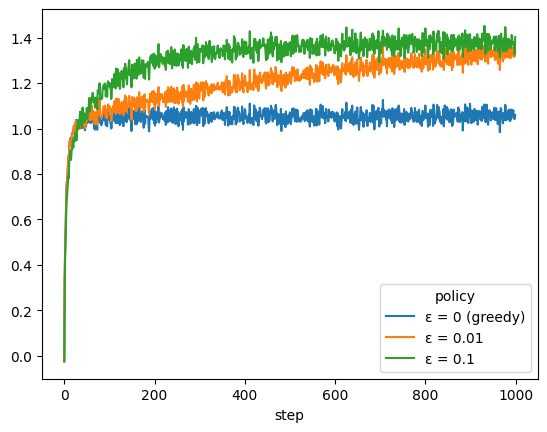

In [4]:
policy_names = {
    0: 'ε = 0.1',
    1: 'ε = 0.01',
    2: 'ε = 0 (greedy)'
}

(
    trace_df
    .assign(policy=trace_df.policy_idx.map(policy_names))
    .groupby(['step', 'policy'])
    ['reward'].mean()
    .unstack()
    .plot()
)


## Controlling the evaluation loop

The `bandit.evaluate` function is useful for benchmarking. But in practice, you'll want to have control over your bandit policy. Indeed you'll want the freedom to pull arms (with the `pull` method) and update the policy (with the `update` method) at your discretion.

As an example, the following is a possible reimplementation of the `bandit.evaluate` function. Here we'll be measuring the rate at which each policy selects the optimal arm.

Note how the `pull` and `update` methods are used.

In [5]:
import copy

policies=[
    bandit.EpsilonGreedy(epsilon=0.1),
    bandit.EpsilonGreedy(epsilon=0.01),
    bandit.EpsilonGreedy(epsilon=0),
]

env = gym.make(
    'river_bandits/KArmedTestbed-v0',
    max_episode_steps=1000
)
n_episodes = 2000

trace = []

with tqdm(total=len(policies) * n_episodes * env._max_episode_steps, position=0) as progress:
    for policy in policies:
        for episode in range(n_episodes):
            episode_policy = policy.clone()
            episode_env = copy.deepcopy(env)
            episode_env.reset()
            step = 0
            while True:
                action = episode_policy.pull(range(episode_env.action_space.n))
                observation, reward, terminated, truncated, info = episode_env.step(action)
                best_action = observation
                episode_policy.update(action, reward)

                trace.append({
                    "episode": episode,
                    "step": step,
                    "policy": f"ε = {policy.epsilon}",
                    "is_action_optimal": action == best_action
                })
                step += 1
                progress.update()

                if terminated or truncated:
                    break

trace_df = pd.DataFrame(trace)


  0%|          | 0/6000000 [00:00<?, ?it/s]

  0%|          | 9801/6000000 [00:00<01:01, 98008.69it/s]

  0%|          | 19951/6000000 [00:00<00:59, 100059.64it/s]

  1%|          | 30021/6000000 [00:00<00:59, 100349.02it/s]

  1%|          | 40149/6000000 [00:00<00:59, 100713.65it/s]

  1%|          | 50233/6000000 [00:00<00:59, 100758.12it/s]

  1%|          | 60342/6000000 [00:00<00:58, 100869.27it/s]

  1%|          | 70450/6000000 [00:00<00:58, 100936.15it/s]

  1%|▏         | 80548/6000000 [00:00<00:58, 100948.53it/s]

  2%|▏         | 90672/6000000 [00:00<00:58, 101036.66it/s]

  2%|▏         | 100776/6000000 [00:01<00:58, 100966.75it/s]

  2%|▏         | 110960/6000000 [00:01<00:58, 101231.17it/s]

  2%|▏         | 121084/6000000 [00:01<00:58, 101165.45it/s]

  2%|▏         | 131256/6000000 [00:01<00:57, 101333.20it/s]

  2%|▏         | 141466/6000000 [00:01<00:57, 101562.90it/s]

  3%|▎         | 151633/6000000 [00:01<00:57, 101594.32it/s]

  3%|▎         | 161793/6000000 [00:01<00:57, 101498.99it/s]

  3%|▎         | 171943/6000000 [00:01<00:57, 101421.37it/s]

  3%|▎         | 182086/6000000 [00:01<00:57, 101144.46it/s]

  3%|▎         | 192248/6000000 [00:01<00:57, 101284.61it/s]

  3%|▎         | 202408/6000000 [00:02<00:57, 101376.90it/s]

  4%|▎         | 212546/6000000 [00:02<00:57, 101193.23it/s]

  4%|▎         | 222771/6000000 [00:02<00:56, 101508.98it/s]

  4%|▍         | 232945/6000000 [00:02<00:56, 101577.28it/s]

  4%|▍         | 243103/6000000 [00:02<00:56, 101364.51it/s]

  4%|▍         | 253274/6000000 [00:02<00:56, 101466.23it/s]

  4%|▍         | 263421/6000000 [00:02<00:56, 101417.56it/s]

  5%|▍         | 273597/6000000 [00:02<00:56, 101518.73it/s]

  5%|▍         | 283749/6000000 [00:02<00:56, 101403.49it/s]

  5%|▍         | 293926/6000000 [00:02<00:56, 101512.73it/s]

  5%|▌         | 304078/6000000 [00:03<00:56, 101400.10it/s]

  5%|▌         | 314260/6000000 [00:03<00:56, 101525.18it/s]

  5%|▌         | 324456/6000000 [00:03<00:55, 101653.19it/s]

  6%|▌         | 334639/6000000 [00:03<00:55, 101704.70it/s]

  6%|▌         | 344863/6000000 [00:03<00:55, 101862.54it/s]

  6%|▌         | 355050/6000000 [00:03<00:55, 101662.01it/s]

  6%|▌         | 365232/6000000 [00:03<00:55, 101709.14it/s]

  6%|▋         | 375404/6000000 [00:03<00:55, 101681.26it/s]

  6%|▋         | 385573/6000000 [00:03<00:55, 101318.18it/s]

  7%|▋         | 395706/6000000 [00:03<00:55, 101288.38it/s]

  7%|▋         | 405866/6000000 [00:04<00:55, 101381.08it/s]

  7%|▋         | 416005/6000000 [00:04<00:55, 100641.56it/s]

  7%|▋         | 426071/6000000 [00:04<00:55, 100407.67it/s]

  7%|▋         | 436217/6000000 [00:04<00:55, 100720.89it/s]

  7%|▋         | 446290/6000000 [00:04<00:55, 100707.86it/s]

  8%|▊         | 456365/6000000 [00:04<00:55, 100718.20it/s]

  8%|▊         | 466438/6000000 [00:04<00:54, 100710.55it/s]

  8%|▊         | 476596/6000000 [00:04<00:54, 100970.56it/s]

  8%|▊         | 486740/6000000 [00:04<00:54, 101110.90it/s]

  8%|▊         | 496852/6000000 [00:04<00:54, 100817.73it/s]

  8%|▊         | 507001/6000000 [00:05<00:54, 100992.55it/s]

  9%|▊         | 517101/6000000 [00:05<00:54, 100745.62it/s]

  9%|▉         | 527274/6000000 [00:05<00:54, 101038.02it/s]

  9%|▉         | 537379/6000000 [00:05<00:54, 100961.51it/s]

  9%|▉         | 547521/6000000 [00:05<00:53, 101096.42it/s]

  9%|▉         | 557662/6000000 [00:05<00:53, 101188.00it/s]

  9%|▉         | 567809/6000000 [00:05<00:53, 101272.25it/s]

 10%|▉         | 577966/6000000 [00:05<00:53, 101360.23it/s]

 10%|▉         | 588103/6000000 [00:05<00:53, 101092.25it/s]

 10%|▉         | 598290/6000000 [00:05<00:53, 101324.22it/s]

 10%|█         | 608423/6000000 [00:06<00:53, 101173.38it/s]

 10%|█         | 618541/6000000 [00:06<00:53, 101162.76it/s]

 10%|█         | 628735/6000000 [00:06<00:52, 101393.34it/s]

 11%|█         | 638916/6000000 [00:06<00:52, 101515.69it/s]

 11%|█         | 649068/6000000 [00:06<00:52, 101220.85it/s]

 11%|█         | 659208/6000000 [00:06<00:52, 101272.46it/s]

 11%|█         | 669336/6000000 [00:06<00:52, 101095.97it/s]

 11%|█▏        | 679446/6000000 [00:06<00:52, 100972.50it/s]

 11%|█▏        | 689544/6000000 [00:06<00:52, 100946.76it/s]

 12%|█▏        | 699639/6000000 [00:06<00:52, 100718.49it/s]

 12%|█▏        | 709717/6000000 [00:07<00:52, 100735.34it/s]

 12%|█▏        | 719865/6000000 [00:07<00:52, 100955.70it/s]

 12%|█▏        | 729975/6000000 [00:07<00:52, 100996.79it/s]

 12%|█▏        | 740075/6000000 [00:07<00:52, 100863.95it/s]

 13%|█▎        | 750214/6000000 [00:07<00:51, 101020.67it/s]

 13%|█▎        | 760317/6000000 [00:07<00:51, 100994.05it/s]

 13%|█▎        | 770417/6000000 [00:07<00:51, 100918.78it/s]

 13%|█▎        | 780529/6000000 [00:07<00:51, 100977.80it/s]

 13%|█▎        | 790627/6000000 [00:07<00:51, 100814.37it/s]

 13%|█▎        | 800716/6000000 [00:07<00:51, 100836.83it/s]

 14%|█▎        | 810803/6000000 [00:08<00:51, 100846.73it/s]

 14%|█▎        | 820888/6000000 [00:08<00:51, 100448.47it/s]

 14%|█▍        | 831001/6000000 [00:08<00:51, 100506.04it/s]

 14%|█▍        | 841137/6000000 [00:08<00:51, 100759.74it/s]

 14%|█▍        | 851247/6000000 [00:08<00:51, 100860.16it/s]

 14%|█▍        | 861334/6000000 [00:08<00:50, 100760.04it/s]

 15%|█▍        | 871418/6000000 [00:08<00:50, 100782.71it/s]

 15%|█▍        | 881497/6000000 [00:08<00:50, 100734.70it/s]

 15%|█▍        | 891594/6000000 [00:08<00:50, 100802.42it/s]

 15%|█▌        | 901675/6000000 [00:08<00:50, 100756.34it/s]

 15%|█▌        | 911751/6000000 [00:09<00:50, 100748.03it/s]

 15%|█▌        | 921882/6000000 [00:09<00:50, 100914.94it/s]

 16%|█▌        | 931974/6000000 [00:09<00:50, 100852.68it/s]

 16%|█▌        | 942060/6000000 [00:09<00:50, 100586.69it/s]

 16%|█▌        | 952119/6000000 [00:09<00:50, 100526.46it/s]

 16%|█▌        | 962226/6000000 [00:09<00:50, 100688.48it/s]

 16%|█▌        | 972330/6000000 [00:09<00:49, 100791.65it/s]

 16%|█▋        | 982420/6000000 [00:09<00:49, 100823.86it/s]

 17%|█▋        | 992597/6000000 [00:09<00:49, 101105.50it/s]

 17%|█▋        | 1002725/6000000 [00:09<00:49, 101155.90it/s]

 17%|█▋        | 1012917/6000000 [00:10<00:49, 101383.76it/s]

 17%|█▋        | 1023056/6000000 [00:10<00:49, 101165.32it/s]

 17%|█▋        | 1033173/6000000 [00:10<00:49, 101092.91it/s]

 17%|█▋        | 1043283/6000000 [00:10<00:49, 100956.73it/s]

 18%|█▊        | 1053379/6000000 [00:10<00:49, 100896.53it/s]

 18%|█▊        | 1063536/6000000 [00:10<00:48, 101097.56it/s]

 18%|█▊        | 1073701/6000000 [00:10<00:48, 101262.95it/s]

 18%|█▊        | 1083832/6000000 [00:10<00:48, 101275.27it/s]

 18%|█▊        | 1093960/6000000 [00:10<00:48, 101260.58it/s]

 18%|█▊        | 1104087/6000000 [00:10<00:48, 101177.00it/s]

 19%|█▊        | 1114242/6000000 [00:11<00:48, 101286.94it/s]

 19%|█▊        | 1124450/6000000 [00:11<00:48, 101523.84it/s]

 19%|█▉        | 1134603/6000000 [00:11<00:48, 101211.91it/s]

 19%|█▉        | 1144737/6000000 [00:11<00:47, 101248.39it/s]

 19%|█▉        | 1154863/6000000 [00:11<00:47, 101234.55it/s]

 19%|█▉        | 1165000/6000000 [00:11<00:47, 101273.64it/s]

 20%|█▉        | 1175128/6000000 [00:11<00:47, 100770.30it/s]

 20%|█▉        | 1185206/6000000 [00:11<00:48, 100223.20it/s]

 20%|█▉        | 1195230/6000000 [00:11<00:48, 99721.55it/s] 

 20%|██        | 1205204/6000000 [00:11<00:48, 99622.62it/s]

 20%|██        | 1215187/6000000 [00:12<00:48, 99682.19it/s]

 20%|██        | 1225156/6000000 [00:12<00:47, 99665.46it/s]

 21%|██        | 1235123/6000000 [00:12<00:48, 99250.19it/s]

 21%|██        | 1245049/6000000 [00:12<00:47, 99121.98it/s]

 21%|██        | 1255035/6000000 [00:12<00:47, 99339.49it/s]

 21%|██        | 1265001/6000000 [00:12<00:47, 99332.46it/s]

 21%|██▏       | 1275001/6000000 [00:12<00:47, 99407.60it/s]

 21%|██▏       | 1284974/6000000 [00:12<00:47, 99501.22it/s]

 22%|██▏       | 1294925/6000000 [00:12<00:47, 99301.67it/s]

 22%|██▏       | 1304856/6000000 [00:12<00:47, 99112.42it/s]

 22%|██▏       | 1314768/6000000 [00:13<00:47, 99113.65it/s]

 22%|██▏       | 1324680/6000000 [00:13<00:47, 98999.73it/s]

 22%|██▏       | 1334581/6000000 [00:13<00:47, 98798.90it/s]

 22%|██▏       | 1344461/6000000 [00:13<00:47, 98719.16it/s]

 23%|██▎       | 1354378/6000000 [00:13<00:46, 98853.22it/s]

 23%|██▎       | 1364288/6000000 [00:13<00:46, 98925.16it/s]

 23%|██▎       | 1374212/6000000 [00:13<00:46, 99018.66it/s]

 23%|██▎       | 1384114/6000000 [00:13<00:46, 98975.81it/s]

 23%|██▎       | 1394012/6000000 [00:13<00:46, 98808.28it/s]

 23%|██▎       | 1403983/6000000 [00:13<00:46, 99078.03it/s]

 24%|██▎       | 1413891/6000000 [00:14<00:46, 98943.87it/s]

 24%|██▎       | 1423799/6000000 [00:14<00:46, 98983.10it/s]

 24%|██▍       | 1433698/6000000 [00:14<00:46, 98707.33it/s]

 24%|██▍       | 1443569/6000000 [00:14<00:46, 98601.27it/s]

 24%|██▍       | 1453430/6000000 [00:14<00:46, 98569.81it/s]

 24%|██▍       | 1463403/6000000 [00:14<00:45, 98916.85it/s]

 25%|██▍       | 1473295/6000000 [00:14<00:45, 98849.35it/s]

 25%|██▍       | 1483181/6000000 [00:14<00:45, 98783.50it/s]

 25%|██▍       | 1493060/6000000 [00:14<00:45, 98577.95it/s]

 25%|██▌       | 1502918/6000000 [00:14<00:45, 98497.15it/s]

 25%|██▌       | 1512768/6000000 [00:15<00:45, 98238.67it/s]

 25%|██▌       | 1522595/6000000 [00:15<00:45, 98246.45it/s]

 26%|██▌       | 1532447/6000000 [00:15<00:45, 98326.17it/s]

 26%|██▌       | 1542395/6000000 [00:15<00:45, 98671.67it/s]

 26%|██▌       | 1552339/6000000 [00:15<00:44, 98901.21it/s]

 26%|██▌       | 1562246/6000000 [00:15<00:44, 98951.05it/s]

 26%|██▌       | 1572142/6000000 [00:15<00:44, 98499.41it/s]

 26%|██▋       | 1582001/6000000 [00:15<00:44, 98419.07it/s]

 27%|██▋       | 1591956/6000000 [00:15<00:44, 98755.56it/s]

 27%|██▋       | 1601893/6000000 [00:15<00:44, 98937.23it/s]

 27%|██▋       | 1611837/6000000 [00:16<00:44, 99085.65it/s]

 27%|██▋       | 1621785/6000000 [00:16<00:44, 99201.57it/s]

 27%|██▋       | 1631706/6000000 [00:16<00:44, 99183.93it/s]

 27%|██▋       | 1641657/6000000 [00:16<00:43, 99280.07it/s]

 28%|██▊       | 1651586/6000000 [00:16<00:43, 99228.67it/s]

 28%|██▊       | 1661548/6000000 [00:16<00:43, 99344.38it/s]

 28%|██▊       | 1671483/6000000 [00:16<00:43, 99311.30it/s]

 28%|██▊       | 1681415/6000000 [00:16<00:43, 99291.58it/s]

 28%|██▊       | 1691345/6000000 [00:16<00:43, 98845.67it/s]

 28%|██▊       | 1701276/6000000 [00:16<00:43, 98982.52it/s]

 29%|██▊       | 1711218/6000000 [00:17<00:43, 99110.78it/s]

 29%|██▊       | 1721144/6000000 [00:17<00:43, 99153.30it/s]

 29%|██▉       | 1731060/6000000 [00:17<00:43, 99085.54it/s]

 29%|██▉       | 1740984/6000000 [00:17<00:42, 99130.78it/s]

 29%|██▉       | 1750898/6000000 [00:17<00:42, 99096.19it/s]

 29%|██▉       | 1760856/6000000 [00:17<00:42, 99240.72it/s]

 30%|██▉       | 1770781/6000000 [00:17<00:42, 99222.68it/s]

 30%|██▉       | 1780782/6000000 [00:17<00:42, 99458.41it/s]

 30%|██▉       | 1790728/6000000 [00:17<00:42, 99274.45it/s]

 30%|███       | 1800660/6000000 [00:17<00:42, 99287.76it/s]

 30%|███       | 1810619/6000000 [00:18<00:42, 99376.37it/s]

 30%|███       | 1820557/6000000 [00:18<00:42, 99328.86it/s]

 31%|███       | 1830490/6000000 [00:18<00:42, 97398.13it/s]

 31%|███       | 1840392/6000000 [00:18<00:42, 97876.93it/s]

 31%|███       | 1850346/6000000 [00:18<00:42, 98370.23it/s]

 31%|███       | 1860294/6000000 [00:18<00:41, 98700.27it/s]

 31%|███       | 1870243/6000000 [00:18<00:41, 98934.98it/s]

 31%|███▏      | 1880167/6000000 [00:18<00:41, 99023.09it/s]

 32%|███▏      | 1890093/6000000 [00:18<00:41, 99092.89it/s]

 32%|███▏      | 1900027/6000000 [00:18<00:41, 99164.80it/s]

 32%|███▏      | 1909996/6000000 [00:19<00:41, 99321.41it/s]

 32%|███▏      | 1919969/6000000 [00:19<00:41, 99443.70it/s]

 32%|███▏      | 1929914/6000000 [00:19<00:40, 99354.64it/s]

 32%|███▏      | 1939872/6000000 [00:19<00:40, 99421.78it/s]

 32%|███▏      | 1949923/6000000 [00:19<00:40, 99747.39it/s]

 33%|███▎      | 1959899/6000000 [00:19<00:40, 99749.41it/s]

 33%|███▎      | 1969875/6000000 [00:19<00:40, 99630.66it/s]

 33%|███▎      | 1979839/6000000 [00:19<00:40, 99502.68it/s]

 33%|███▎      | 1989790/6000000 [00:19<00:40, 99430.36it/s]

 33%|███▎      | 1999734/6000000 [00:19<00:40, 99353.18it/s]

 33%|███▎      | 2009670/6000000 [00:20<00:40, 97505.98it/s]

 34%|███▎      | 2019429/6000000 [00:20<00:41, 96557.19it/s]

 34%|███▍      | 2029091/6000000 [00:20<00:42, 93679.30it/s]

 34%|███▍      | 2038598/6000000 [00:20<00:42, 94082.23it/s]

 34%|███▍      | 2048021/6000000 [00:20<00:42, 93953.21it/s]

 34%|███▍      | 2057427/6000000 [00:20<00:42, 93831.56it/s]

 34%|███▍      | 2066817/6000000 [00:20<00:41, 93728.84it/s]

 35%|███▍      | 2076195/6000000 [00:20<00:41, 93602.55it/s]

 35%|███▍      | 2085559/6000000 [00:20<00:41, 93299.01it/s]

 35%|███▍      | 2095001/6000000 [00:20<00:41, 93584.43it/s]

 35%|███▌      | 2104362/6000000 [00:21<00:41, 93408.55it/s]

 35%|███▌      | 2113705/6000000 [00:21<00:41, 93153.88it/s]

 35%|███▌      | 2123022/6000000 [00:21<00:42, 92205.42it/s]

 36%|███▌      | 2132330/6000000 [00:21<00:41, 92463.15it/s]

 36%|███▌      | 2141579/6000000 [00:21<00:41, 92293.37it/s]

 36%|███▌      | 2150964/6000000 [00:21<00:41, 92756.55it/s]

 36%|███▌      | 2160241/6000000 [00:21<00:41, 92710.11it/s]

 36%|███▌      | 2169513/6000000 [00:21<00:41, 92708.01it/s]

 36%|███▋      | 2178813/6000000 [00:21<00:41, 92793.01it/s]

 36%|███▋      | 2188180/6000000 [00:21<00:40, 93054.37it/s]

 37%|███▋      | 2197486/6000000 [00:22<00:41, 92607.99it/s]

 37%|███▋      | 2206791/6000000 [00:22<00:40, 92738.40it/s]

 37%|███▋      | 2216066/6000000 [00:22<00:41, 90933.42it/s]

 37%|███▋      | 2225414/6000000 [00:22<00:41, 91683.38it/s]

 37%|███▋      | 2234769/6000000 [00:22<00:40, 92234.47it/s]

 37%|███▋      | 2244174/6000000 [00:22<00:40, 92773.82it/s]

 38%|███▊      | 2253456/6000000 [00:22<00:40, 92711.99it/s]

 38%|███▊      | 2262731/6000000 [00:22<00:40, 92720.59it/s]

 38%|███▊      | 2272006/6000000 [00:22<00:40, 92563.62it/s]

 38%|███▊      | 2281264/6000000 [00:22<00:40, 92382.19it/s]

 38%|███▊      | 2290584/6000000 [00:23<00:40, 92625.24it/s]

 38%|███▊      | 2299903/6000000 [00:23<00:39, 92793.71it/s]

 38%|███▊      | 2309183/6000000 [00:23<00:39, 92573.69it/s]

 39%|███▊      | 2318441/6000000 [00:23<00:39, 92092.39it/s]

 39%|███▉      | 2327720/6000000 [00:23<00:39, 92299.44it/s]

 39%|███▉      | 2336951/6000000 [00:23<00:39, 92218.67it/s]

 39%|███▉      | 2346174/6000000 [00:23<00:39, 92059.15it/s]

 39%|███▉      | 2355381/6000000 [00:23<00:39, 91771.07it/s]

 39%|███▉      | 2364611/6000000 [00:23<00:39, 91927.25it/s]

 40%|███▉      | 2373877/6000000 [00:23<00:39, 92143.73it/s]

 40%|███▉      | 2383092/6000000 [00:24<00:39, 92079.93it/s]

 40%|███▉      | 2392382/6000000 [00:24<00:39, 92324.19it/s]

 40%|████      | 2401809/6000000 [00:24<00:38, 92906.14it/s]

 40%|████      | 2411160/6000000 [00:24<00:38, 93084.54it/s]

 40%|████      | 2420499/6000000 [00:24<00:38, 93174.93it/s]

 40%|████      | 2429817/6000000 [00:24<00:38, 93149.24it/s]

 41%|████      | 2439172/6000000 [00:24<00:38, 93267.43it/s]

 41%|████      | 2448499/6000000 [00:24<00:38, 93093.38it/s]

 41%|████      | 2457809/6000000 [00:24<00:38, 92790.78it/s]

 41%|████      | 2467089/6000000 [00:25<00:38, 92595.36it/s]

 41%|████▏     | 2476349/6000000 [00:25<00:38, 92571.38it/s]

 41%|████▏     | 2485679/6000000 [00:25<00:37, 92786.11it/s]

 42%|████▏     | 2494983/6000000 [00:25<00:37, 92861.68it/s]

 42%|████▏     | 2504270/6000000 [00:25<00:37, 92122.68it/s]

 42%|████▏     | 2513603/6000000 [00:25<00:37, 92480.73it/s]

 42%|████▏     | 2522913/6000000 [00:25<00:37, 92665.21it/s]

 42%|████▏     | 2532181/6000000 [00:25<00:37, 92224.74it/s]

 42%|████▏     | 2541516/6000000 [00:25<00:37, 92557.74it/s]

 43%|████▎     | 2550898/6000000 [00:25<00:37, 92932.75it/s]

 43%|████▎     | 2560308/6000000 [00:26<00:36, 93281.90it/s]

 43%|████▎     | 2569638/6000000 [00:26<00:36, 93286.82it/s]

 43%|████▎     | 2578968/6000000 [00:26<00:36, 93163.96it/s]

 43%|████▎     | 2588285/6000000 [00:26<00:36, 93076.23it/s]

 43%|████▎     | 2597593/6000000 [00:26<00:36, 92560.84it/s]

 43%|████▎     | 2606850/6000000 [00:26<00:36, 92448.17it/s]

 44%|████▎     | 2616180/6000000 [00:26<00:36, 92700.06it/s]

 44%|████▍     | 2625451/6000000 [00:26<00:36, 92569.02it/s]

 44%|████▍     | 2634798/6000000 [00:26<00:36, 92837.00it/s]

 44%|████▍     | 2644083/6000000 [00:26<00:36, 92819.39it/s]

 44%|████▍     | 2653366/6000000 [00:27<00:36, 92764.44it/s]

 44%|████▍     | 2662877/6000000 [00:27<00:35, 93464.88it/s]

 45%|████▍     | 2672224/6000000 [00:27<00:35, 93354.87it/s]

 45%|████▍     | 2681702/6000000 [00:27<00:35, 93779.71it/s]

 45%|████▍     | 2691081/6000000 [00:27<00:35, 93558.51it/s]

 45%|████▌     | 2700452/6000000 [00:27<00:35, 93602.07it/s]

 45%|████▌     | 2709959/6000000 [00:27<00:34, 94041.22it/s]

 45%|████▌     | 2719364/6000000 [00:27<00:35, 93429.11it/s]

 45%|████▌     | 2728708/6000000 [00:27<00:35, 93043.01it/s]

 46%|████▌     | 2738014/6000000 [00:27<00:35, 92999.08it/s]

 46%|████▌     | 2747377/6000000 [00:28<00:34, 93184.90it/s]

 46%|████▌     | 2756874/6000000 [00:28<00:34, 93716.73it/s]

 46%|████▌     | 2766247/6000000 [00:28<00:34, 93475.77it/s]

 46%|████▋     | 2775596/6000000 [00:28<00:34, 93100.13it/s]

 46%|████▋     | 2784973/6000000 [00:28<00:34, 93297.65it/s]

 47%|████▋     | 2794479/6000000 [00:28<00:34, 93823.18it/s]

 47%|████▋     | 2804001/6000000 [00:28<00:33, 94080.07it/s]

 47%|████▋     | 2813410/6000000 [00:28<00:33, 94022.99it/s]

 47%|████▋     | 2822957/6000000 [00:28<00:33, 94455.39it/s]

 47%|████▋     | 2832403/6000000 [00:28<00:33, 93942.03it/s]

 47%|████▋     | 2841882/6000000 [00:29<00:33, 94192.74it/s]

 48%|████▊     | 2851302/6000000 [00:29<00:33, 94048.15it/s]

 48%|████▊     | 2860708/6000000 [00:29<00:33, 93658.17it/s]

 48%|████▊     | 2870075/6000000 [00:29<00:33, 93360.22it/s]

 48%|████▊     | 2879412/6000000 [00:29<00:34, 91697.20it/s]

 48%|████▊     | 2888855/6000000 [00:29<00:33, 92501.55it/s]

 48%|████▊     | 2898328/6000000 [00:29<00:33, 93159.57it/s]

 48%|████▊     | 2907823/6000000 [00:29<00:33, 93691.32it/s]

 49%|████▊     | 2917196/6000000 [00:29<00:32, 93605.51it/s]

 49%|████▉     | 2926584/6000000 [00:29<00:32, 93684.88it/s]

 49%|████▉     | 2935955/6000000 [00:30<00:32, 93452.27it/s]

 49%|████▉     | 2945302/6000000 [00:30<00:32, 93107.77it/s]

 49%|████▉     | 2954680/6000000 [00:30<00:32, 93307.29it/s]

 49%|████▉     | 2964012/6000000 [00:30<00:32, 93207.45it/s]

 50%|████▉     | 2973334/6000000 [00:30<00:33, 90835.11it/s]

 50%|████▉     | 2982635/6000000 [00:30<00:32, 91471.92it/s]

 50%|████▉     | 2992008/6000000 [00:30<00:32, 92139.42it/s]

 50%|█████     | 3001271/6000000 [00:30<00:32, 92285.07it/s]

 50%|█████     | 3010602/6000000 [00:30<00:32, 92588.94it/s]

 50%|█████     | 3019938/6000000 [00:30<00:32, 92818.93it/s]

 50%|█████     | 3029224/6000000 [00:31<00:32, 92740.21it/s]

 51%|█████     | 3038586/6000000 [00:31<00:31, 93002.82it/s]

 51%|█████     | 3047888/6000000 [00:31<00:31, 92818.07it/s]

 51%|█████     | 3057171/6000000 [00:31<00:32, 90128.36it/s]

 51%|█████     | 3066349/6000000 [00:31<00:32, 90611.19it/s]

 51%|█████▏    | 3075740/6000000 [00:31<00:31, 91583.06it/s]

 51%|█████▏    | 3085130/6000000 [00:31<00:31, 92268.23it/s]

 52%|█████▏    | 3094454/6000000 [00:31<00:31, 92555.32it/s]

 52%|█████▏    | 3103838/6000000 [00:31<00:31, 92937.55it/s]

 52%|█████▏    | 3113214/6000000 [00:31<00:30, 93182.03it/s]

 52%|█████▏    | 3122658/6000000 [00:32<00:30, 93558.28it/s]

 52%|█████▏    | 3132086/6000000 [00:32<00:30, 93771.53it/s]

 52%|█████▏    | 3141465/6000000 [00:32<00:30, 93617.20it/s]

 53%|█████▎    | 3150828/6000000 [00:32<00:30, 93461.37it/s]

 53%|█████▎    | 3160176/6000000 [00:32<00:30, 93171.02it/s]

 53%|█████▎    | 3169494/6000000 [00:32<00:30, 93102.90it/s]

 53%|█████▎    | 3178833/6000000 [00:32<00:30, 93187.37it/s]

 53%|█████▎    | 3188272/6000000 [00:32<00:30, 93546.38it/s]

 53%|█████▎    | 3197627/6000000 [00:32<00:30, 93173.39it/s]

 53%|█████▎    | 3207001/6000000 [00:32<00:29, 93333.08it/s]

 54%|█████▎    | 3216385/6000000 [00:33<00:29, 93484.22it/s]

 54%|█████▍    | 3225734/6000000 [00:33<00:29, 93164.30it/s]

 54%|█████▍    | 3235051/6000000 [00:33<00:29, 92846.57it/s]

 54%|█████▍    | 3244413/6000000 [00:33<00:29, 93076.85it/s]

 54%|█████▍    | 3253722/6000000 [00:33<00:29, 92705.72it/s]

 54%|█████▍    | 3262994/6000000 [00:33<00:29, 92660.30it/s]

 55%|█████▍    | 3272261/6000000 [00:33<00:29, 92344.72it/s]

 55%|█████▍    | 3281571/6000000 [00:33<00:29, 92567.70it/s]

 55%|█████▍    | 3290842/6000000 [00:33<00:29, 92609.20it/s]

 55%|█████▌    | 3300104/6000000 [00:33<00:29, 92545.97it/s]

 55%|█████▌    | 3309359/6000000 [00:34<00:29, 92490.25it/s]

 55%|█████▌    | 3318633/6000000 [00:34<00:28, 92562.60it/s]

 55%|█████▌    | 3328077/6000000 [00:34<00:28, 93123.83it/s]

 56%|█████▌    | 3337390/6000000 [00:34<00:28, 92682.80it/s]

 56%|█████▌    | 3346659/6000000 [00:34<00:29, 90106.93it/s]

 56%|█████▌    | 3355984/6000000 [00:34<00:29, 91027.18it/s]

 56%|█████▌    | 3365313/6000000 [00:34<00:28, 91691.69it/s]

 56%|█████▌    | 3374493/6000000 [00:34<00:29, 89112.09it/s]

 56%|█████▋    | 3383425/6000000 [00:34<00:29, 88676.21it/s]

 57%|█████▋    | 3392307/6000000 [00:34<00:30, 86613.12it/s]

 57%|█████▋    | 3401720/6000000 [00:35<00:29, 88791.86it/s]

 57%|█████▋    | 3411081/6000000 [00:35<00:28, 90202.49it/s]

 57%|█████▋    | 3420150/6000000 [00:35<00:28, 90345.78it/s]

 57%|█████▋    | 3429488/6000000 [00:35<00:28, 91243.48it/s]

 57%|█████▋    | 3438733/6000000 [00:35<00:27, 91600.68it/s]

 57%|█████▋    | 3447900/6000000 [00:35<00:27, 91555.82it/s]

 58%|█████▊    | 3457234/6000000 [00:35<00:27, 92086.90it/s]

 58%|█████▊    | 3466478/6000000 [00:35<00:27, 92190.15it/s]

 58%|█████▊    | 3475732/6000000 [00:35<00:27, 92294.24it/s]

 58%|█████▊    | 3485199/6000000 [00:35<00:27, 93004.13it/s]

 58%|█████▊    | 3494571/6000000 [00:36<00:26, 93217.61it/s]

 58%|█████▊    | 3503997/6000000 [00:36<00:26, 93527.37it/s]

 59%|█████▊    | 3513351/6000000 [00:36<00:26, 93365.80it/s]

 59%|█████▊    | 3522689/6000000 [00:36<00:26, 92900.40it/s]

 59%|█████▉    | 3531980/6000000 [00:36<00:26, 92549.81it/s]

 59%|█████▉    | 3541236/6000000 [00:36<00:26, 92072.69it/s]

 59%|█████▉    | 3550567/6000000 [00:36<00:26, 92440.69it/s]

 59%|█████▉    | 3559956/6000000 [00:36<00:26, 92872.60it/s]

 59%|█████▉    | 3569245/6000000 [00:36<00:26, 92561.40it/s]

 60%|█████▉    | 3578502/6000000 [00:36<00:26, 92512.11it/s]

 60%|█████▉    | 3587948/6000000 [00:37<00:25, 93093.47it/s]

 60%|█████▉    | 3597258/6000000 [00:37<00:25, 92758.02it/s]

 60%|██████    | 3606590/6000000 [00:37<00:25, 92925.69it/s]

 60%|██████    | 3615922/6000000 [00:37<00:25, 93042.44it/s]

 60%|██████    | 3625227/6000000 [00:37<00:25, 92861.02it/s]

 61%|██████    | 3634514/6000000 [00:37<00:25, 92513.46it/s]

 61%|██████    | 3643867/6000000 [00:37<00:25, 92816.49it/s]

 61%|██████    | 3653150/6000000 [00:37<00:25, 92623.59it/s]

 61%|██████    | 3662439/6000000 [00:37<00:25, 92701.32it/s]

 61%|██████    | 3671749/6000000 [00:38<00:25, 92819.37it/s]

 61%|██████▏   | 3681032/6000000 [00:38<00:24, 92779.53it/s]

 62%|██████▏   | 3690333/6000000 [00:38<00:24, 92847.12it/s]

 62%|██████▏   | 3699641/6000000 [00:38<00:24, 92915.01it/s]

 62%|██████▏   | 3708981/6000000 [00:38<00:24, 93057.68it/s]

 62%|██████▏   | 3718341/6000000 [00:38<00:24, 93216.84it/s]

 62%|██████▏   | 3727663/6000000 [00:38<00:24, 90979.94it/s]

 62%|██████▏   | 3737170/6000000 [00:38<00:24, 92185.13it/s]

 62%|██████▏   | 3746399/6000000 [00:38<00:24, 92172.08it/s]

 63%|██████▎   | 3755788/6000000 [00:38<00:24, 92680.94it/s]

 63%|██████▎   | 3765064/6000000 [00:39<00:24, 92703.35it/s]

 63%|██████▎   | 3774339/6000000 [00:39<00:24, 92652.52it/s]

 63%|██████▎   | 3783831/6000000 [00:39<00:23, 93327.71it/s]

 63%|██████▎   | 3793166/6000000 [00:39<00:23, 93175.26it/s]

 63%|██████▎   | 3802527/6000000 [00:39<00:23, 93304.46it/s]

 64%|██████▎   | 3811859/6000000 [00:39<00:23, 93302.88it/s]

 64%|██████▎   | 3821191/6000000 [00:39<00:23, 92896.10it/s]

 64%|██████▍   | 3830496/6000000 [00:39<00:23, 92939.66it/s]

 64%|██████▍   | 3839810/6000000 [00:39<00:23, 92997.62it/s]

 64%|██████▍   | 3849111/6000000 [00:39<00:23, 92709.92it/s]

 64%|██████▍   | 3858557/6000000 [00:40<00:22, 93230.60it/s]

 64%|██████▍   | 3867941/6000000 [00:40<00:22, 93409.98it/s]

 65%|██████▍   | 3877283/6000000 [00:40<00:22, 92701.06it/s]

 65%|██████▍   | 3886617/6000000 [00:40<00:22, 92891.04it/s]

 65%|██████▍   | 3895908/6000000 [00:40<00:22, 92754.49it/s]

 65%|██████▌   | 3905185/6000000 [00:40<00:22, 92702.70it/s]

 65%|██████▌   | 3914456/6000000 [00:40<00:22, 90872.75it/s]

 65%|██████▌   | 3923826/6000000 [00:40<00:22, 91705.43it/s]

 66%|██████▌   | 3933168/6000000 [00:40<00:22, 92213.66it/s]

 66%|██████▌   | 3942601/6000000 [00:40<00:22, 92840.69it/s]

 66%|██████▌   | 3951989/6000000 [00:41<00:21, 93150.61it/s]

 66%|██████▌   | 3961308/6000000 [00:41<00:21, 92888.38it/s]

 66%|██████▌   | 3970600/6000000 [00:41<00:21, 92736.45it/s]

 66%|██████▋   | 3979876/6000000 [00:41<00:21, 92647.67it/s]

 66%|██████▋   | 3989142/6000000 [00:41<00:21, 92553.79it/s]

 67%|██████▋   | 3998401/6000000 [00:41<00:21, 92563.06it/s]

 67%|██████▋   | 4007873/6000000 [00:41<00:21, 93207.04it/s]

 67%|██████▋   | 4017377/6000000 [00:41<00:21, 93754.12it/s]

 67%|██████▋   | 4026800/6000000 [00:41<00:21, 93895.06it/s]

 67%|██████▋   | 4036270/6000000 [00:41<00:20, 94134.81it/s]

 67%|██████▋   | 4045715/6000000 [00:42<00:20, 94228.12it/s]

 68%|██████▊   | 4055231/6000000 [00:42<00:20, 94506.03it/s]

 68%|██████▊   | 4064817/6000000 [00:42<00:20, 94911.37it/s]

 68%|██████▊   | 4074309/6000000 [00:42<00:20, 94684.73it/s]

 68%|██████▊   | 4083801/6000000 [00:42<00:20, 94752.91it/s]

 68%|██████▊   | 4093460/6000000 [00:42<00:20, 95302.79it/s]

 68%|██████▊   | 4102991/6000000 [00:42<00:20, 91864.80it/s]

 69%|██████▊   | 4112639/6000000 [00:42<00:20, 93210.54it/s]

 69%|██████▊   | 4122063/6000000 [00:42<00:20, 93513.36it/s]

 69%|██████▉   | 4131530/6000000 [00:42<00:19, 93855.66it/s]

 69%|██████▉   | 4140998/6000000 [00:43<00:19, 94098.59it/s]

 69%|██████▉   | 4150541/6000000 [00:43<00:19, 94492.85it/s]

 69%|██████▉   | 4160092/6000000 [00:43<00:19, 94796.24it/s]

 69%|██████▉   | 4169852/6000000 [00:43<00:19, 95633.08it/s]

 70%|██████▉   | 4179419/6000000 [00:43<00:19, 95622.05it/s]

 70%|██████▉   | 4188984/6000000 [00:43<00:18, 95433.65it/s]

 70%|██████▉   | 4198530/6000000 [00:43<00:18, 95258.57it/s]

 70%|███████   | 4208058/6000000 [00:43<00:18, 95052.55it/s]

 70%|███████   | 4217596/6000000 [00:43<00:18, 95149.83it/s]

 70%|███████   | 4227112/6000000 [00:43<00:18, 94701.43it/s]

 71%|███████   | 4236623/6000000 [00:44<00:18, 94822.65it/s]

 71%|███████   | 4246106/6000000 [00:44<00:18, 94511.41it/s]

 71%|███████   | 4255938/6000000 [00:44<00:18, 95646.55it/s]

 71%|███████   | 4265640/6000000 [00:44<00:18, 96057.06it/s]

 71%|███████▏  | 4275247/6000000 [00:44<00:18, 95777.07it/s]

 71%|███████▏  | 4284826/6000000 [00:44<00:17, 95623.50it/s]

 72%|███████▏  | 4294389/6000000 [00:44<00:17, 95563.77it/s]

 72%|███████▏  | 4303957/6000000 [00:44<00:17, 95597.33it/s]

 72%|███████▏  | 4313517/6000000 [00:44<00:17, 94847.05it/s]

 72%|███████▏  | 4323154/6000000 [00:44<00:17, 95298.65it/s]

 72%|███████▏  | 4332686/6000000 [00:45<00:17, 95243.77it/s]

 72%|███████▏  | 4342316/6000000 [00:45<00:17, 95557.86it/s]

 73%|███████▎  | 4351968/6000000 [00:45<00:17, 95844.43it/s]

 73%|███████▎  | 4361605/6000000 [00:45<00:17, 95999.97it/s]

 73%|███████▎  | 4371207/6000000 [00:45<00:16, 96004.77it/s]

 73%|███████▎  | 4380808/6000000 [00:45<00:16, 95955.56it/s]

 73%|███████▎  | 4390493/6000000 [00:45<00:16, 96222.88it/s]

 73%|███████▎  | 4400116/6000000 [00:45<00:16, 94957.12it/s]

 73%|███████▎  | 4409721/6000000 [00:45<00:16, 95281.47it/s]

 74%|███████▎  | 4419389/6000000 [00:45<00:16, 95697.02it/s]

 74%|███████▍  | 4429032/6000000 [00:46<00:16, 95915.34it/s]

 74%|███████▍  | 4438733/6000000 [00:46<00:16, 96240.18it/s]

 74%|███████▍  | 4448359/6000000 [00:46<00:16, 96080.71it/s]

 74%|███████▍  | 4457993/6000000 [00:46<00:16, 96155.42it/s]

 74%|███████▍  | 4467610/6000000 [00:46<00:15, 95868.37it/s]

 75%|███████▍  | 4477198/6000000 [00:46<00:15, 95527.84it/s]

 75%|███████▍  | 4486752/6000000 [00:46<00:15, 95380.80it/s]

 75%|███████▍  | 4496291/6000000 [00:46<00:16, 91654.41it/s]

 75%|███████▌  | 4505907/6000000 [00:46<00:16, 92961.75it/s]

 75%|███████▌  | 4515294/6000000 [00:46<00:15, 93226.35it/s]

 75%|███████▌  | 4524862/6000000 [00:47<00:15, 93950.74it/s]

 76%|███████▌  | 4534271/6000000 [00:47<00:15, 93920.39it/s]

 76%|███████▌  | 4543673/6000000 [00:47<00:15, 93911.95it/s]

 76%|███████▌  | 4553111/6000000 [00:47<00:15, 94048.88it/s]

 76%|███████▌  | 4562816/6000000 [00:47<00:15, 94945.17it/s]

 76%|███████▌  | 4572316/6000000 [00:47<00:15, 94961.53it/s]

 76%|███████▋  | 4582001/6000000 [00:47<00:14, 95428.84it/s]

 77%|███████▋  | 4591546/6000000 [00:47<00:14, 95253.75it/s]

 77%|███████▋  | 4601144/6000000 [00:47<00:14, 95469.47it/s]

 77%|███████▋  | 4610741/6000000 [00:47<00:14, 95618.67it/s]

 77%|███████▋  | 4620423/6000000 [00:48<00:14, 95976.12it/s]

 77%|███████▋  | 4630052/6000000 [00:48<00:14, 96068.50it/s]

 77%|███████▋  | 4639660/6000000 [00:48<00:14, 95721.14it/s]

 77%|███████▋  | 4649233/6000000 [00:48<00:14, 95158.39it/s]

 78%|███████▊  | 4658833/6000000 [00:48<00:14, 95408.29it/s]

 78%|███████▊  | 4668375/6000000 [00:48<00:13, 95250.86it/s]

 78%|███████▊  | 4678021/6000000 [00:48<00:13, 95609.83it/s]

 78%|███████▊  | 4687583/6000000 [00:48<00:13, 94060.46it/s]

 78%|███████▊  | 4697001/6000000 [00:48<00:13, 93945.59it/s]

 78%|███████▊  | 4706470/6000000 [00:48<00:13, 94166.04it/s]

 79%|███████▊  | 4716132/6000000 [00:49<00:13, 94894.07it/s]

 79%|███████▉  | 4725624/6000000 [00:49<00:13, 94819.33it/s]

 79%|███████▉  | 4735108/6000000 [00:49<00:13, 94768.50it/s]

 79%|███████▉  | 4744587/6000000 [00:49<00:13, 94752.80it/s]

 79%|███████▉  | 4754064/6000000 [00:49<00:13, 94485.91it/s]

 79%|███████▉  | 4763676/6000000 [00:49<00:13, 94973.69it/s]

 80%|███████▉  | 4773175/6000000 [00:49<00:12, 94739.76it/s]

 80%|███████▉  | 4782650/6000000 [00:49<00:12, 94704.31it/s]

 80%|███████▉  | 4792289/6000000 [00:49<00:12, 95206.78it/s]

 80%|████████  | 4802090/6000000 [00:49<00:12, 96043.77it/s]

 80%|████████  | 4811695/6000000 [00:50<00:12, 95878.50it/s]

 80%|████████  | 4821284/6000000 [00:50<00:12, 95474.50it/s]

 81%|████████  | 4830925/6000000 [00:50<00:12, 95751.53it/s]

 81%|████████  | 4840501/6000000 [00:50<00:12, 95733.41it/s]

 81%|████████  | 4850075/6000000 [00:50<00:12, 95478.22it/s]

 81%|████████  | 4859624/6000000 [00:50<00:11, 95449.86it/s]

 81%|████████  | 4869196/6000000 [00:50<00:11, 95528.60it/s]

 81%|████████▏ | 4878750/6000000 [00:50<00:11, 95489.91it/s]

 81%|████████▏ | 4888300/6000000 [00:50<00:12, 91970.36it/s]

 82%|████████▏ | 4897934/6000000 [00:51<00:11, 93244.97it/s]

 82%|████████▏ | 4907323/6000000 [00:51<00:11, 93432.29it/s]

 82%|████████▏ | 4916913/6000000 [00:51<00:11, 94162.19it/s]

 82%|████████▏ | 4926430/6000000 [00:51<00:11, 94461.01it/s]

 82%|████████▏ | 4936057/6000000 [00:51<00:11, 94999.22it/s]

 82%|████████▏ | 4945599/6000000 [00:51<00:11, 95124.75it/s]

 83%|████████▎ | 4955157/6000000 [00:51<00:10, 95259.75it/s]

 83%|████████▎ | 4964687/6000000 [00:51<00:10, 95189.36it/s]

 83%|████████▎ | 4974347/6000000 [00:51<00:10, 95609.66it/s]

 83%|████████▎ | 4983910/6000000 [00:51<00:10, 94816.78it/s]

 83%|████████▎ | 4993466/6000000 [00:52<00:10, 95037.21it/s]

 83%|████████▎ | 5002982/6000000 [00:52<00:10, 95072.07it/s]

 84%|████████▎ | 5012491/6000000 [00:52<00:10, 94938.26it/s]

 84%|████████▎ | 5022001/6000000 [00:52<00:10, 94855.88it/s]

 84%|████████▍ | 5031549/6000000 [00:52<00:10, 95040.00it/s]

 84%|████████▍ | 5041054/6000000 [00:52<00:10, 94920.77it/s]

 84%|████████▍ | 5050571/6000000 [00:52<00:09, 94994.56it/s]

 84%|████████▍ | 5060127/6000000 [00:52<00:09, 95161.13it/s]

 84%|████████▍ | 5069644/6000000 [00:52<00:09, 95161.77it/s]

 85%|████████▍ | 5079161/6000000 [00:52<00:09, 94010.71it/s]

 85%|████████▍ | 5088699/6000000 [00:53<00:09, 94416.70it/s]

 85%|████████▍ | 5098149/6000000 [00:53<00:09, 94439.20it/s]

 85%|████████▌ | 5107724/6000000 [00:53<00:09, 94829.68it/s]

 85%|████████▌ | 5117209/6000000 [00:53<00:09, 94824.09it/s]

 85%|████████▌ | 5126693/6000000 [00:53<00:09, 92080.61it/s]

 86%|████████▌ | 5135919/6000000 [00:53<00:09, 90720.03it/s]

 86%|████████▌ | 5145154/6000000 [00:53<00:09, 91195.26it/s]

 86%|████████▌ | 5154789/6000000 [00:53<00:09, 92710.53it/s]

 86%|████████▌ | 5164226/6000000 [00:53<00:08, 93199.47it/s]

 86%|████████▌ | 5173555/6000000 [00:53<00:09, 90467.14it/s]

 86%|████████▋ | 5183229/6000000 [00:54<00:08, 92295.44it/s]

 87%|████████▋ | 5192740/6000000 [00:54<00:08, 93121.61it/s]

 87%|████████▋ | 5202152/6000000 [00:54<00:08, 93414.97it/s]

 87%|████████▋ | 5211679/6000000 [00:54<00:08, 93965.85it/s]

 87%|████████▋ | 5221210/6000000 [00:54<00:08, 94364.81it/s]

 87%|████████▋ | 5230887/6000000 [00:54<00:08, 95082.31it/s]

 87%|████████▋ | 5240461/6000000 [00:54<00:07, 95278.92it/s]

 88%|████████▊ | 5250001/6000000 [00:54<00:07, 95218.91it/s]

 88%|████████▊ | 5259551/6000000 [00:54<00:07, 95302.04it/s]

 88%|████████▊ | 5269083/6000000 [00:54<00:07, 93607.29it/s]

 88%|████████▊ | 5278592/6000000 [00:55<00:07, 94042.92it/s]

 88%|████████▊ | 5288003/6000000 [00:55<00:07, 94031.64it/s]

 88%|████████▊ | 5297528/6000000 [00:55<00:07, 94391.93it/s]

 88%|████████▊ | 5307086/6000000 [00:55<00:07, 94744.53it/s]

 89%|████████▊ | 5316563/6000000 [00:55<00:07, 94322.77it/s]

 89%|████████▉ | 5326211/6000000 [00:55<00:07, 94963.57it/s]

 89%|████████▉ | 5335710/6000000 [00:55<00:07, 94806.62it/s]

 89%|████████▉ | 5345378/6000000 [00:55<00:06, 95364.39it/s]

 89%|████████▉ | 5354916/6000000 [00:55<00:06, 95296.56it/s]

 89%|████████▉ | 5364447/6000000 [00:55<00:06, 91729.54it/s]

 90%|████████▉ | 5373967/6000000 [00:56<00:06, 92740.90it/s]

 90%|████████▉ | 5383439/6000000 [00:56<00:06, 93321.31it/s]

 90%|████████▉ | 5392957/6000000 [00:56<00:06, 93867.73it/s]

 90%|█████████ | 5402357/6000000 [00:56<00:06, 93719.15it/s]

 90%|█████████ | 5411829/6000000 [00:56<00:06, 94015.86it/s]

 90%|█████████ | 5421262/6000000 [00:56<00:06, 94109.37it/s]

 91%|█████████ | 5430888/6000000 [00:56<00:06, 94750.72it/s]

 91%|█████████ | 5440448/6000000 [00:56<00:05, 95004.39it/s]

 91%|█████████ | 5449993/6000000 [00:56<00:05, 95136.13it/s]

 91%|█████████ | 5459509/6000000 [00:56<00:05, 94905.86it/s]

 91%|█████████ | 5469001/6000000 [00:57<00:05, 94390.15it/s]

 91%|█████████▏| 5478495/6000000 [00:57<00:05, 94553.64it/s]

 91%|█████████▏| 5487952/6000000 [00:57<00:05, 94533.50it/s]

 92%|█████████▏| 5497407/6000000 [00:57<00:05, 93987.74it/s]

 92%|█████████▏| 5506960/6000000 [00:57<00:05, 94445.63it/s]

 92%|█████████▏| 5516406/6000000 [00:57<00:05, 94072.45it/s]

 92%|█████████▏| 5526096/6000000 [00:57<00:04, 94913.62it/s]

 92%|█████████▏| 5535797/6000000 [00:57<00:04, 95538.06it/s]

 92%|█████████▏| 5545352/6000000 [00:57<00:04, 95326.83it/s]

 93%|█████████▎| 5555176/6000000 [00:57<00:04, 96196.35it/s]

 93%|█████████▎| 5564797/6000000 [00:58<00:04, 95248.36it/s]

 93%|█████████▎| 5574325/6000000 [00:58<00:04, 95003.18it/s]

 93%|█████████▎| 5583828/6000000 [00:58<00:04, 94987.33it/s]

 93%|█████████▎| 5593328/6000000 [00:58<00:04, 94957.98it/s]

 93%|█████████▎| 5602942/6000000 [00:58<00:04, 95308.58it/s]

 94%|█████████▎| 5612474/6000000 [00:58<00:04, 95283.42it/s]

 94%|█████████▎| 5622003/6000000 [00:58<00:03, 95233.49it/s]

 94%|█████████▍| 5631695/6000000 [00:58<00:03, 95737.77it/s]

 94%|█████████▍| 5641385/6000000 [00:58<00:03, 96083.71it/s]

 94%|█████████▍| 5650994/6000000 [00:58<00:03, 96016.60it/s]

 94%|█████████▍| 5660596/6000000 [00:59<00:03, 94006.75it/s]

 95%|█████████▍| 5670080/6000000 [00:59<00:03, 94251.46it/s]

 95%|█████████▍| 5679854/6000000 [00:59<00:03, 95285.01it/s]

 95%|█████████▍| 5689469/6000000 [00:59<00:03, 95541.31it/s]

 95%|█████████▍| 5699110/6000000 [00:59<00:03, 95800.12it/s]

 95%|█████████▌| 5708761/6000000 [00:59<00:03, 96011.34it/s]

 95%|█████████▌| 5718365/6000000 [00:59<00:02, 95403.43it/s]

 95%|█████████▌| 5728064/6000000 [00:59<00:02, 95874.97it/s]

 96%|█████████▌| 5737896/6000000 [00:59<00:02, 96604.67it/s]

 96%|█████████▌| 5747580/6000000 [00:59<00:02, 96672.94it/s]

 96%|█████████▌| 5757249/6000000 [01:00<00:02, 94593.21it/s]

 96%|█████████▌| 5766758/6000000 [01:00<00:02, 94738.05it/s]

 96%|█████████▋| 5776240/6000000 [01:00<00:02, 94608.10it/s]

 96%|█████████▋| 5785940/6000000 [01:00<00:02, 95317.39it/s]

 97%|█████████▋| 5795477/6000000 [01:00<00:02, 95066.35it/s]

 97%|█████████▋| 5805100/6000000 [01:00<00:02, 95411.81it/s]

 97%|█████████▋| 5814644/6000000 [01:00<00:01, 94895.19it/s]

 97%|█████████▋| 5824136/6000000 [01:00<00:01, 94460.26it/s]

 97%|█████████▋| 5833786/6000000 [01:00<00:01, 95065.01it/s]

 97%|█████████▋| 5843295/6000000 [01:00<00:01, 94847.96it/s]

 98%|█████████▊| 5852781/6000000 [01:01<00:01, 91551.11it/s]

 98%|█████████▊| 5862275/6000000 [01:01<00:01, 92536.90it/s]

 98%|█████████▊| 5871909/6000000 [01:01<00:01, 93654.76it/s]

 98%|█████████▊| 5881291/6000000 [01:01<00:01, 93673.80it/s]

 98%|█████████▊| 5890780/6000000 [01:01<00:01, 94032.23it/s]

 98%|█████████▊| 5900192/6000000 [01:01<00:01, 93767.09it/s]

 98%|█████████▊| 5909849/6000000 [01:01<00:00, 94600.45it/s]

 99%|█████████▊| 5919314/6000000 [01:01<00:00, 94410.42it/s]

 99%|█████████▉| 5928959/6000000 [01:01<00:00, 95018.54it/s]

 99%|█████████▉| 5938494/6000000 [01:02<00:00, 95116.10it/s]

 99%|█████████▉| 5948008/6000000 [01:02<00:00, 94529.57it/s]

 99%|█████████▉| 5957511/6000000 [01:02<00:00, 94677.73it/s]

 99%|█████████▉| 5967142/6000000 [01:02<00:00, 95162.55it/s]

100%|█████████▉| 5976660/6000000 [01:02<00:00, 95013.46it/s]

100%|█████████▉| 5986298/6000000 [01:02<00:00, 95419.18it/s]

100%|█████████▉| 5995865/6000000 [01:02<00:00, 95491.83it/s]

100%|██████████| 6000000/6000000 [01:02<00:00, 95766.04it/s]

<Axes: xlabel='step'>

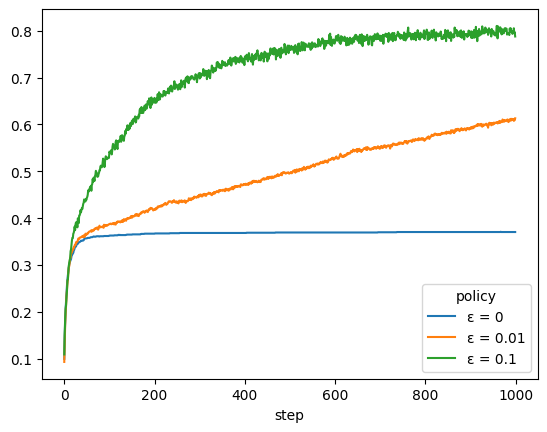

In [6]:
colors = {
    'ε = 0.1': 'tab:blue',
    'ε = 0.01': 'tab:red',
    'ε = 0': 'tab:green'
}

(
    trace_df
    .groupby(['step', 'policy'])
    ['is_action_optimal'].mean()
    .unstack()
    .plot()
)


## Handling drift

The environment used above is a toy situation used for introducing bandits. It is stationary, meaning that the expected reward of each arm does not change over time.

In practice, arms are dynamic, and their performance can vary over time. A simple example of this is the [Candy Cane Contest](https://www.kaggle.com/c/santa-2020) that was hosted on Kaggle in 2020. The expected reward of each arm diminishes each time it is pulled.

The way bandit policies in River deal with drift depends on the method. For the `bandit.EpsilonGreedy` policy, it makes sense to use a rolling average as the reward object. What this means is that the empirical reward the policy calculates for each arm is a rolling average, rather than a global one.

In [7]:
from river import proba, utils

policies=[
    bandit.EpsilonGreedy(
        epsilon=0.1,
        seed=42
    ),
    bandit.EpsilonGreedy(
        epsilon=0.3,
        reward_obj=utils.Rolling(stats.Mean(), window_size=50),
        seed=42
    ),
    bandit.ThompsonSampling(
        reward_obj=proba.Beta(),
        seed=42
    )
]

env = gym.make('river_bandits/CandyCaneContest-v0')

trace = bandit.evaluate(
    policies=policies,
    env=env,
    n_episodes=(n_episodes := 30),
    seed=42
)

trace_df = pd.DataFrame(tqdm(
    trace, position=0, total=(
        n_episodes *
        len(policies) *
        env._max_episode_steps
    )
))


  0%|          | 0/180000 [00:00<?, ?it/s]

  0%|          | 66/180000 [00:00<04:32, 659.29it/s]

  0%|          | 867/180000 [00:00<00:35, 4976.66it/s]

  1%|          | 1611/180000 [00:00<00:29, 6098.58it/s]

  1%|▏         | 2352/180000 [00:00<00:26, 6612.11it/s]

  2%|▏         | 3095/180000 [00:00<00:25, 6905.70it/s]

  2%|▏         | 3837/180000 [00:00<00:24, 7079.65it/s]

  3%|▎         | 4576/180000 [00:00<00:24, 7180.76it/s]

  3%|▎         | 5317/180000 [00:00<00:24, 7253.16it/s]

  3%|▎         | 6043/180000 [00:00<00:25, 6700.47it/s]

  4%|▍         | 6846/180000 [00:01<00:24, 7086.27it/s]

  4%|▍         | 7581/180000 [00:01<00:24, 7160.11it/s]

  5%|▍         | 8317/180000 [00:01<00:23, 7218.16it/s]

  5%|▌         | 9051/180000 [00:01<00:23, 7253.99it/s]

  5%|▌         | 9789/180000 [00:01<00:23, 7286.88it/s]

  6%|▌         | 10528/180000 [00:01<00:23, 7317.14it/s]

  6%|▋         | 11263/180000 [00:01<00:23, 7326.54it/s]

  7%|▋         | 11997/180000 [00:01<00:22, 7324.68it/s]

  7%|▋         | 12731/180000 [00:01<00:23, 7217.08it/s]

  7%|▋         | 13460/180000 [00:01<00:23, 7237.56it/s]

  8%|▊         | 14187/180000 [00:02<00:22, 7244.81it/s]

  8%|▊         | 14913/180000 [00:02<00:22, 7247.63it/s]

  9%|▊         | 15642/180000 [00:02<00:22, 7259.88it/s]

  9%|▉         | 16369/180000 [00:02<00:22, 7258.12it/s]

  9%|▉         | 17095/180000 [00:02<00:22, 7258.38it/s]

 10%|▉         | 17823/180000 [00:02<00:22, 7263.44it/s]

 10%|█         | 18550/180000 [00:02<00:22, 7118.73it/s]

 11%|█         | 19295/180000 [00:02<00:22, 7216.14it/s]

 11%|█         | 20028/180000 [00:02<00:22, 7248.10it/s]

 12%|█▏        | 20754/180000 [00:02<00:22, 7087.19it/s]

 12%|█▏        | 21496/180000 [00:03<00:22, 7183.71it/s]

 12%|█▏        | 22242/180000 [00:03<00:21, 7264.11it/s]

 13%|█▎        | 22986/180000 [00:03<00:21, 7310.77it/s]

 13%|█▎        | 23727/180000 [00:03<00:21, 7333.49it/s]

 14%|█▎        | 24461/180000 [00:03<00:21, 7184.06it/s]

 14%|█▍        | 25209/180000 [00:03<00:21, 7268.70it/s]

 14%|█▍        | 25941/180000 [00:03<00:21, 7278.43it/s]

 15%|█▍        | 26675/180000 [00:03<00:21, 7296.41it/s]

 15%|█▌        | 27406/180000 [00:03<00:20, 7278.97it/s]

 16%|█▌        | 28135/180000 [00:03<00:20, 7251.28it/s]

 16%|█▌        | 28861/180000 [00:04<00:20, 7247.11it/s]

 16%|█▋        | 29590/180000 [00:04<00:20, 7259.82it/s]

 17%|█▋        | 30317/180000 [00:04<00:21, 7082.90it/s]

 17%|█▋        | 31074/180000 [00:04<00:20, 7224.58it/s]

 18%|█▊        | 31818/180000 [00:04<00:20, 7282.87it/s]

 18%|█▊        | 32554/180000 [00:04<00:20, 7305.51it/s]

 18%|█▊        | 33286/180000 [00:04<00:20, 7297.77it/s]

 19%|█▉        | 34017/180000 [00:04<00:20, 7285.19it/s]

 19%|█▉        | 34746/180000 [00:04<00:19, 7267.56it/s]

 20%|█▉        | 35473/180000 [00:04<00:20, 6950.71it/s]

 20%|██        | 36171/180000 [00:05<00:21, 6821.52it/s]

 21%|██        | 36947/180000 [00:05<00:20, 7091.57it/s]

 21%|██        | 37690/180000 [00:05<00:19, 7190.06it/s]

 21%|██▏       | 38418/180000 [00:05<00:19, 7211.75it/s]

 22%|██▏       | 39165/180000 [00:05<00:19, 7286.94it/s]

 22%|██▏       | 39911/180000 [00:05<00:19, 7337.35it/s]

 23%|██▎       | 40655/180000 [00:05<00:18, 7366.91it/s]

 23%|██▎       | 41397/180000 [00:05<00:18, 7377.63it/s]

 23%|██▎       | 42136/180000 [00:05<00:19, 7138.92it/s]

 24%|██▍       | 42910/180000 [00:06<00:18, 7313.52it/s]

 24%|██▍       | 43647/180000 [00:06<00:18, 7326.37it/s]

 25%|██▍       | 44382/180000 [00:06<00:18, 7330.66it/s]

 25%|██▌       | 45118/180000 [00:06<00:18, 7338.06it/s]

 25%|██▌       | 45853/180000 [00:06<00:18, 7327.77it/s]

 26%|██▌       | 46587/180000 [00:06<00:18, 7317.46it/s]

 26%|██▋       | 47320/180000 [00:06<00:18, 7317.85it/s]

 27%|██▋       | 48053/180000 [00:06<00:18, 7028.02it/s]

 27%|██▋       | 48843/180000 [00:06<00:18, 7278.04it/s]

 28%|██▊       | 49574/180000 [00:06<00:17, 7269.03it/s]

 28%|██▊       | 50303/180000 [00:07<00:18, 7101.16it/s]

 28%|██▊       | 51036/180000 [00:07<00:17, 7167.76it/s]

 29%|██▉       | 51772/180000 [00:07<00:17, 7223.64it/s]

 29%|██▉       | 52503/180000 [00:07<00:17, 7243.69it/s]

 30%|██▉       | 53238/180000 [00:07<00:17, 7269.55it/s]

 30%|██▉       | 53972/180000 [00:07<00:17, 7290.12it/s]

 30%|███       | 54702/180000 [00:07<00:17, 7159.73it/s]

 31%|███       | 55431/180000 [00:07<00:17, 7197.87it/s]

 31%|███       | 56154/180000 [00:07<00:17, 7202.69it/s]

 32%|███▏      | 56875/180000 [00:07<00:17, 7159.80it/s]

 32%|███▏      | 57600/180000 [00:08<00:17, 7183.66it/s]

 32%|███▏      | 58329/180000 [00:08<00:16, 7214.10it/s]

 33%|███▎      | 59059/180000 [00:08<00:16, 7238.46it/s]

 33%|███▎      | 59787/180000 [00:08<00:16, 7250.40it/s]

 34%|███▎      | 60513/180000 [00:08<00:16, 7099.91it/s]

 34%|███▍      | 61255/180000 [00:08<00:16, 7193.95it/s]

 34%|███▍      | 61991/180000 [00:08<00:16, 7242.99it/s]

 35%|███▍      | 62730/180000 [00:08<00:16, 7283.08it/s]

 35%|███▌      | 63464/180000 [00:08<00:15, 7299.94it/s]

 36%|███▌      | 64200/180000 [00:08<00:15, 7315.98it/s]

 36%|███▌      | 64940/180000 [00:09<00:15, 7340.13it/s]

 36%|███▋      | 65675/180000 [00:09<00:16, 7034.85it/s]

 37%|███▋      | 66382/180000 [00:09<00:16, 6935.68it/s]

 37%|███▋      | 67131/180000 [00:09<00:15, 7092.81it/s]

 38%|███▊      | 67866/180000 [00:09<00:15, 7164.40it/s]

 38%|███▊      | 68595/180000 [00:09<00:15, 7199.27it/s]

 39%|███▊      | 69326/180000 [00:09<00:15, 7231.63it/s]

 39%|███▉      | 70058/180000 [00:09<00:15, 7257.81it/s]

 39%|███▉      | 70785/180000 [00:09<00:15, 7228.37it/s]

 40%|███▉      | 71520/180000 [00:09<00:14, 7259.72it/s]

 40%|████      | 72247/180000 [00:10<00:15, 7074.06it/s]

 41%|████      | 73008/180000 [00:10<00:14, 7227.20it/s]

 41%|████      | 73749/180000 [00:10<00:14, 7280.28it/s]

 41%|████▏     | 74478/180000 [00:10<00:14, 7281.57it/s]

 42%|████▏     | 75210/180000 [00:10<00:14, 7291.98it/s]

 42%|████▏     | 75940/180000 [00:10<00:14, 7284.98it/s]

 43%|████▎     | 76669/180000 [00:10<00:14, 7284.91it/s]

 43%|████▎     | 77400/180000 [00:10<00:14, 7289.73it/s]

 43%|████▎     | 78130/180000 [00:10<00:14, 7049.66it/s]

 44%|████▍     | 78912/180000 [00:10<00:13, 7273.29it/s]

 44%|████▍     | 79650/180000 [00:11<00:13, 7301.77it/s]

 45%|████▍     | 80382/180000 [00:11<00:13, 7298.82it/s]

 45%|████▌     | 81113/180000 [00:11<00:13, 7297.46it/s]

 45%|████▌     | 81844/180000 [00:11<00:13, 7280.35it/s]

 46%|████▌     | 82575/180000 [00:11<00:13, 7285.92it/s]

 46%|████▋     | 83304/180000 [00:11<00:13, 7286.42it/s]

 47%|████▋     | 84033/180000 [00:11<00:13, 7002.59it/s]

 47%|████▋     | 84831/180000 [00:11<00:13, 7284.88it/s]

 48%|████▊     | 85563/180000 [00:11<00:12, 7281.19it/s]

 48%|████▊     | 86293/180000 [00:12<00:12, 7279.66it/s]

 48%|████▊     | 87023/180000 [00:12<00:12, 7270.69it/s]

 49%|████▉     | 87751/180000 [00:12<00:13, 6943.02it/s]

 49%|████▉     | 88476/180000 [00:12<00:13, 7030.50it/s]

 50%|████▉     | 89205/180000 [00:12<00:12, 7105.10it/s]

 50%|████▉     | 89934/180000 [00:12<00:12, 7157.19it/s]

 50%|█████     | 90652/180000 [00:12<00:12, 7050.00it/s]

 51%|█████     | 91386/180000 [00:12<00:12, 7129.26it/s]

 51%|█████     | 92115/180000 [00:12<00:12, 7175.09it/s]

 52%|█████▏    | 92850/180000 [00:12<00:12, 7224.15it/s]

 52%|█████▏    | 93582/180000 [00:13<00:11, 7246.91it/s]

 52%|█████▏    | 94317/180000 [00:13<00:11, 7276.70it/s]

 53%|█████▎    | 95049/180000 [00:13<00:11, 7283.82it/s]

 53%|█████▎    | 95787/180000 [00:13<00:11, 7311.32it/s]

 54%|█████▎    | 96519/180000 [00:13<00:11, 7153.89it/s]

 54%|█████▍    | 97257/180000 [00:13<00:11, 7220.11it/s]

 54%|█████▍    | 97990/180000 [00:13<00:11, 7252.25it/s]

 55%|█████▍    | 98723/180000 [00:13<00:11, 7275.08it/s]

 55%|█████▌    | 99451/180000 [00:13<00:11, 7268.60it/s]

 56%|█████▌    | 100179/180000 [00:13<00:11, 7235.40it/s]

 56%|█████▌    | 100909/180000 [00:14<00:10, 7254.31it/s]

 56%|█████▋    | 101640/180000 [00:14<00:10, 7265.92it/s]

 57%|█████▋    | 102367/180000 [00:14<00:10, 7073.94it/s]

 57%|█████▋    | 103122/180000 [00:14<00:10, 7213.31it/s]

 58%|█████▊    | 103854/180000 [00:14<00:10, 7241.99it/s]

 58%|█████▊    | 104580/180000 [00:14<00:10, 7224.56it/s]

 59%|█████▊    | 105308/180000 [00:14<00:10, 7240.27it/s]

 59%|█████▉    | 106035/180000 [00:14<00:10, 7246.76it/s]

 59%|█████▉    | 106764/180000 [00:14<00:10, 7256.37it/s]

 60%|█████▉    | 107493/180000 [00:14<00:09, 7261.38it/s]

 60%|██████    | 108220/180000 [00:15<00:10, 7058.31it/s]

 61%|██████    | 108980/180000 [00:15<00:09, 7215.99it/s]

 61%|██████    | 109709/180000 [00:15<00:09, 7237.80it/s]

 61%|██████▏   | 110437/180000 [00:15<00:09, 7249.49it/s]

 62%|██████▏   | 111168/180000 [00:15<00:09, 7266.64it/s]

 62%|██████▏   | 111906/180000 [00:15<00:09, 7298.00it/s]

 63%|██████▎   | 112649/180000 [00:15<00:09, 7337.30it/s]

 63%|██████▎   | 113390/180000 [00:15<00:09, 7357.00it/s]

 63%|██████▎   | 114126/180000 [00:15<00:09, 7098.85it/s]

 64%|██████▍   | 114900/180000 [00:15<00:08, 7283.23it/s]

 64%|██████▍   | 115632/180000 [00:16<00:08, 7293.24it/s]

 65%|██████▍   | 116367/180000 [00:16<00:08, 7303.97it/s]

 65%|██████▌   | 117103/180000 [00:16<00:08, 7320.23it/s]

 65%|██████▌   | 117836/180000 [00:16<00:08, 7303.93it/s]

 66%|██████▌   | 118575/180000 [00:16<00:08, 7325.23it/s]

 66%|██████▋   | 119310/180000 [00:16<00:08, 7328.50it/s]

 67%|██████▋   | 120044/180000 [00:16<00:08, 7044.83it/s]

 67%|██████▋   | 120840/180000 [00:16<00:08, 7305.29it/s]

 68%|██████▊   | 121587/180000 [00:16<00:07, 7347.94it/s]

 68%|██████▊   | 122325/180000 [00:16<00:07, 7354.12it/s]

 68%|██████▊   | 123070/180000 [00:17<00:07, 7382.23it/s]

 69%|██████▉   | 123816/180000 [00:17<00:07, 7399.47it/s]

 69%|██████▉   | 124557/180000 [00:17<00:07, 7375.90it/s]

 70%|██████▉   | 125296/180000 [00:17<00:07, 7378.45it/s]

 70%|███████   | 126035/180000 [00:17<00:07, 7077.57it/s]

 70%|███████   | 126834/180000 [00:17<00:07, 7340.02it/s]

 71%|███████   | 127572/180000 [00:17<00:07, 7345.94it/s]

 71%|███████▏  | 128309/180000 [00:17<00:07, 7332.28it/s]

 72%|███████▏  | 129044/180000 [00:17<00:06, 7303.11it/s]

 72%|███████▏  | 129776/180000 [00:18<00:06, 7289.77it/s]

 73%|███████▎  | 130506/180000 [00:18<00:06, 7273.22it/s]

 73%|███████▎  | 131238/180000 [00:18<00:06, 7283.43it/s]

 73%|███████▎  | 131973/180000 [00:18<00:06, 7292.74it/s]

 74%|███████▎  | 132703/180000 [00:18<00:06, 6918.08it/s]

 74%|███████▍  | 133434/180000 [00:18<00:06, 7028.03it/s]

 75%|███████▍  | 134169/180000 [00:18<00:06, 7121.69it/s]

 75%|███████▍  | 134898/180000 [00:18<00:06, 7170.94it/s]

 75%|███████▌  | 135627/180000 [00:18<00:06, 7204.73it/s]

 76%|███████▌  | 136349/180000 [00:18<00:06, 7102.76it/s]

 76%|███████▌  | 137082/180000 [00:19<00:05, 7164.57it/s]

 77%|███████▋  | 137814/180000 [00:19<00:05, 7204.96it/s]

 77%|███████▋  | 138536/180000 [00:19<00:05, 7063.50it/s]

 77%|███████▋  | 139272/180000 [00:19<00:05, 7145.07it/s]

 78%|███████▊  | 140001/180000 [00:19<00:05, 7185.00it/s]

 78%|███████▊  | 140730/180000 [00:19<00:05, 7214.99it/s]

 79%|███████▊  | 141465/180000 [00:19<00:05, 7249.06it/s]

 79%|███████▉  | 142197/180000 [00:19<00:05, 7264.09it/s]

 79%|███████▉  | 142926/180000 [00:19<00:05, 7268.25it/s]

 80%|███████▉  | 143654/180000 [00:19<00:05, 7229.69it/s]

 80%|████████  | 144378/180000 [00:20<00:05, 7060.92it/s]

 81%|████████  | 145128/180000 [00:20<00:04, 7184.04it/s]

 81%|████████  | 145867/180000 [00:20<00:04, 7243.88it/s]

 81%|████████▏ | 146604/180000 [00:20<00:04, 7277.52it/s]

 82%|████████▏ | 147333/180000 [00:20<00:04, 7215.63it/s]

 82%|████████▏ | 148079/180000 [00:20<00:04, 7287.37it/s]

 83%|████████▎ | 148820/180000 [00:20<00:04, 7323.15it/s]

 83%|████████▎ | 149562/180000 [00:20<00:04, 7350.24it/s]

 83%|████████▎ | 150298/180000 [00:20<00:04, 7135.21it/s]

 84%|████████▍ | 151062/180000 [00:20<00:03, 7278.72it/s]

 84%|████████▍ | 151806/180000 [00:21<00:03, 7324.99it/s]

 85%|████████▍ | 152548/180000 [00:21<00:03, 7351.98it/s]

 85%|████████▌ | 153286/180000 [00:21<00:03, 7359.69it/s]

 86%|████████▌ | 154023/180000 [00:21<00:03, 7341.63it/s]

 86%|████████▌ | 154758/180000 [00:21<00:03, 7317.15it/s]

 86%|████████▋ | 155490/180000 [00:21<00:03, 7309.16it/s]

 87%|████████▋ | 156222/180000 [00:21<00:03, 7078.07it/s]

 87%|████████▋ | 156996/180000 [00:21<00:03, 7267.04it/s]

 88%|████████▊ | 157725/180000 [00:21<00:03, 7258.65it/s]

 88%|████████▊ | 158452/180000 [00:21<00:02, 7251.85it/s]

 88%|████████▊ | 159178/180000 [00:22<00:02, 7242.08it/s]

 89%|████████▉ | 159903/180000 [00:22<00:02, 7240.35it/s]

 89%|████████▉ | 160628/180000 [00:22<00:02, 7237.96it/s]

 90%|████████▉ | 161353/180000 [00:22<00:02, 7240.49it/s]

 90%|█████████ | 162078/180000 [00:22<00:02, 6935.80it/s]

 90%|█████████ | 162867/180000 [00:22<00:02, 7211.76it/s]

 91%|█████████ | 163607/180000 [00:22<00:02, 7266.38it/s]

 91%|█████████▏| 164346/180000 [00:22<00:02, 7301.45it/s]

 92%|█████████▏| 165079/180000 [00:22<00:02, 7309.35it/s]

 92%|█████████▏| 165812/180000 [00:22<00:01, 7308.08it/s]

 93%|█████████▎| 166544/180000 [00:23<00:01, 7305.31it/s]

 93%|█████████▎| 167277/180000 [00:23<00:01, 7312.58it/s]

 93%|█████████▎| 168009/180000 [00:23<00:01, 7008.07it/s]

 94%|█████████▍| 168810/180000 [00:23<00:01, 7293.64it/s]

 94%|█████████▍| 169543/180000 [00:23<00:01, 7296.12it/s]

 95%|█████████▍| 170280/180000 [00:23<00:01, 7313.91it/s]

 95%|█████████▌| 171018/180000 [00:23<00:01, 7331.80it/s]

 95%|█████████▌| 171753/180000 [00:23<00:01, 7334.50it/s]

 96%|█████████▌| 172488/180000 [00:23<00:01, 7323.41it/s]

 96%|█████████▌| 173221/180000 [00:24<00:00, 7306.89it/s]

 97%|█████████▋| 173958/180000 [00:24<00:00, 7323.81it/s]

 97%|█████████▋| 174691/180000 [00:24<00:00, 7157.16it/s]

 97%|█████████▋| 175431/180000 [00:24<00:00, 7224.14it/s]

 98%|█████████▊| 176155/180000 [00:24<00:00, 7158.95it/s]

 98%|█████████▊| 176886/180000 [00:24<00:00, 7199.29it/s]

 99%|█████████▊| 177630/180000 [00:24<00:00, 7264.43it/s]

 99%|█████████▉| 178368/180000 [00:24<00:00, 7297.34it/s]

100%|█████████▉| 179106/180000 [00:24<00:00, 7317.98it/s]

100%|█████████▉| 179847/180000 [00:24<00:00, 7341.18it/s]

100%|██████████| 180000/180000 [00:24<00:00, 7214.04it/s]

We can compare the performance of each policy by checking the average reward at the end of each episode.

In [8]:
(
    trace_df
    .groupby(['policy_idx', 'episode'])
    .last()
    .groupby('policy_idx')
    .reward_stat.mean()
)



policy_idx
0    736.1
1    817.0
2    854.0
Name: reward_stat, dtype: float64

We see that using a rolling average gives a boost to the epsilon greedy strategy. However, we see that the `bandit.ThompsonSampling` policy performs even better, even though no particular care was given to drift. A natural next step would thus be to see how it could be improved to handle drift. For instance, its `dist` parameter could be wrapped with a `utils.Rolling`:

In [9]:
policy = bandit.ThompsonSampling(
    reward_obj=utils.Rolling(proba.Beta(), window_size=50),
    seed=42
)


Bandits can be used for several tasks. They can be used for content personalization, as well as online model selection (see `model_selection.BanditRegressor`). The policies in River are therefore designed to be flexible, so that they can be used in conjunction with other River modules. For instance, the `reward_obj` in `bandit.EpsilonGreedy` can be a metric, a probability distribution, or a statistic. This works because objects in River adher to a coherent get/update interface.